[矢吹太朗『コンピュータでとく数学』（オーム社, 2024）](https://github.com/taroyabuki/comath)




# 1 実行環境

In [1]:
!python -m pip install see

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sympy as sym
from collections import Counter
from patsy import dmatrices
from scipy import linalg, stats
from scipy.integrate import quad
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ttest_ind
from sympy import *
from sympy.stats import *
from sympy.plotting import plot3d

In [3]:
np.sqrt(2)

1.4142135623730951

In [4]:
data = pd.DataFrame({'x1': [1, 3, 6, 10], 'y': [7, 1, 6, 14]})
model = smf.ols('y ~ x1', data).fit()
model.params

Intercept    2.0
x1           1.0
dtype: float64

In [5]:
from see import see
see(model)
#   .outlier_test()      .params              .predict()           .pvalues
#   .remove_data()       .resid               .resid_pearson       .rsquared
#   .rsquared_adj        .save()              .scale               .ssr
#   .summary()           .summary2()          .t_test()

    <                    <=                   ==                   !=
    >                    >=                   dir()                hash()
    help()               repr()               str()                .HC0_se
    .HC1_se              .HC2_se              .HC3_se              .aic
    .bic                 .bse                 .centered_tss
    .compare_f_test()    .compare_lm_test()
    .compare_lr_test()                        .condition_number    .conf_int()
    .conf_int_el()       .cov_HC0             .cov_HC1             .cov_HC2
    .cov_HC3             .cov_kwds            .cov_params()        .cov_type
    .df_model            .df_resid            .eigenvals           .el_test()
    .ess                 .f_pvalue            .f_test()
    .fittedvalues        .fvalue              .get_influence()
    .get_prediction()    .get_robustcov_results()
    .info_criteria()     .initialize()        .k_constant          .llf
    .load()              .model               .mse_mod

# 2 数と変数

In [6]:
2 * (-3)

-6

In [7]:
(1 + 2) * 3

9

In [8]:
2**10

1024

In [9]:
-2 < -1

True

In [10]:
2 + 2 == 5

False

In [11]:
10 if (7 < 5) else 20

20

In [12]:
var('x') # xが変数であることの宣言
x < 1

x < 1

In [13]:
var('x y')
Eq(x, y)

Eq(x, y)

In [14]:
simplify(Eq((x**2 - 1), (x + 1) * (x - 1)))

True

In [15]:
not(0<1)

False

In [16]:
(0<1)or(2>3)

True

In [17]:
(0 < 1) and (2 > 3)

False

In [18]:
var('x')
Not(10 < x)

x <= 10

In [19]:
x = 5; x == 5

True

In [20]:
a = 1 + 2
b = 9
a * (b + 1)

30

In [21]:
a = 1 + 2; b = 9; a * (b + 1)

30

In [22]:
a = 3
var('a') # 変数を記号にする．
expand((a + 1)**2)

a**2 + 2*a + 1

In [23]:
import keyword
keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [24]:
x1 = 2; x2 = 3; x1 + x2

5

In [25]:
x = 1; y = x + 1; x = 2; y

2

In [26]:
var('x')
f = 2 * x + 3
f.subs(x, 5)

13

In [27]:
var('a b x y')
g = a + b
g.subs(((a, x), (b, y)))

x + y

In [28]:
f = lambda x: 2 * x + 3
f(5)

13

In [29]:
def f(x): return 2 * x + 3
f(5)

13

In [30]:
f = lambda x: 2 * x + 3; var('a')
g = f(a)
f(5), g.subs(a, 5)

(13, 13)

In [31]:
f = lambda x: 1 / x
f(1)

1.0

In [32]:
(lambda x: 2 * x + 3)(5)

13

In [33]:
f = lambda x, y: x + y
f(2, 3)

5

In [34]:
g = lambda x: x[0] + x[1]
x = (2, 3); g(x)

5

In [35]:
f(*x)

5

In [36]:
g((2, 3))

5

In [37]:
var('x')
expand((x + 1)**2)

x**2 + 2*x + 1

In [38]:
N(sqrt(2), 30)

1.41421356237309504880168872421

In [39]:
import struct
tmp = bin(int(struct.pack('>d', 0.1).hex(), 16))[2:].zfill(64) # ビット列
s, e, f = tmp[0], tmp[1:12], tmp[12:64] # 1, 11, 52桁に分ける．
s, e, f

('0', '01111111011', '1001100110011001100110011001100110011001100110011010')

In [40]:
s, e, f = int(s), sym.S(int(e, 2)), sym.S(int(f, 2)) # 数値に変換する．
(-1)**s * (1 + f / 2**52) * 2**(e - 1023)

3602879701896397/36028797018963968

In [41]:
import sympy
sympy.sqrt(5)**2 == 5 # True

True

In [42]:
import math
import numpy
numpy.sqrt(5)**2 == 5, math.sqrt(5)**2 == 5 # いずれもFalse

(False, False)

In [43]:
0.1 + 0.2 == 0.3

False

In [44]:
np.isclose(0.1 + 0.2, 0.3)

True

In [45]:
sym.S(1) / 10 + sym.S(2) / 10 == sym.S(3) / 10

True

In [46]:
var('x')
simplify(sin(x)**2 + cos(x)**2)

1

In [47]:
sqrtdenest(sqrt(5 + 2 * sqrt(6)))

sqrt(2) + sqrt(3)

In [48]:
refine(sqrt((x - 1)**2), Q.nonnegative(x - 1))

x - 1

# 3 データ構造

In [49]:
v = [2, 3, 5]; len(v)

3

In [50]:
v[2] = 0.5; v

[2, 3, 0.5]

In [51]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [52]:
np.arange(0, 1.01, 0.1) # 終点（ここでは1）より大きい値を指定する．

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [53]:
np.linspace(0, 100, 5)

array([  0.,  25.,  50.,  75., 100.])

In [54]:
v = np.array([2, 3])
1.1 * v

array([2.2, 3.3])

In [55]:
u = np.array([10, 20]); v = np.array([2, 3])
u + v

array([12, 23])

In [56]:
v + 1

array([3, 4])

In [57]:
u = np.array([10, 20]); v = np.array([2, 3])
u.dot(v)

80

In [58]:
a = [2, 3, 4]; b = a.copy(); b[2] = 0.5; a

[2, 3, 4]

In [59]:
v = [2, -1, 3, -2]
[x for x in v if x > 0] # 内包表記

[2, 3]

In [60]:
v = [2, -1, 3, -2]
np.heaviside(v, 0)

array([1., 0., 1., 0.])

In [61]:
v = [2, -1, 3, -2]
n = len(v)     # vのサイズ
u = [None] * n # Noneは「値がない」ということ．
for i in range(n): u[i] = 0 if v[i] < 0 else 1
u

[1, 0, 1, 0]

In [62]:
v = [2, -1, 3, -2]
[(0 if x < 0 else 1) for x in v]

[1, 0, 1, 0]

In [63]:
v = [2, -1, 3, -2]
f = lambda x: 0 if x < 0 else 1
[f(x) for x in v]

[1, 0, 1, 0]

In [64]:
f = np.vectorize(lambda x: 0 if x < 0 else 1)
f(v)

array([1, 0, 1, 0])

In [65]:
u = [1, 7, 2, 9]; v = [2, 3, 5, 7]
[(-1 if a < b else 1) for a, b in zip(u, v)]

[-1, 1, -1, 1]

In [66]:
x = {"apple" : "りんご", "orange" : "みかん"}
x["orange"]

'みかん'

In [67]:
x["grape"] = "ぶどう"
x["grape"]

'ぶどう'

In [68]:
x.pop("apple")
"apple" in x

False

In [69]:
df = pd.DataFrame({'name': ['A', 'B', 'C'],
                   'english': [60, 90, 70],
                   'math': [70, 80, 90],
                   'gender': ['f', 'm', 'm']})
df

,name,english,math,gender
0,A,60,70,f
1,B,90,80,m
2,C,70,90,m


In [70]:
df = pd.DataFrame(({'name': 'A', 'english': 60, 'math': 70, 'gender': 'f'},
                   {'name': 'B', 'english': 90, 'math': 80, 'gender': 'm'},
                   {'name': 'C', 'english': 70, 'math': 90, 'gender': 'm'}))
df

,name,english,math,gender
0,A,60,70,f
1,B,90,80,m
2,C,70,90,m


In [71]:
df[['english', 'math']]

,english,math
0,60,70
1,90,80
2,70,90


In [72]:
df["english"]

0    60
1    90
2    70
Name: english, dtype: int64

In [73]:
df.english

0    60
1    90
2    70
Name: english, dtype: int64

In [74]:
m = df.iloc[:, [1, 2]].values; m

array([[60, 70],
       [90, 80],
       [70, 90]])

In [75]:
english, math = m.T; english, math

(array([60, 90, 70]), array([70, 80, 90]))

# 4 可視化と方程式

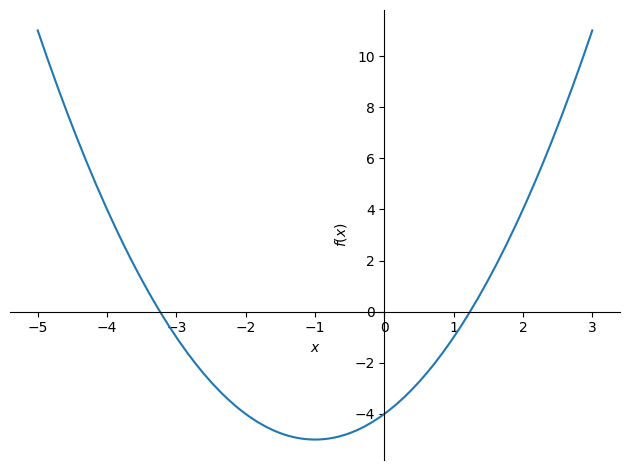

In [76]:
var('x')
plot(x**2 + 2 * x - 4, (x, -5, 3));

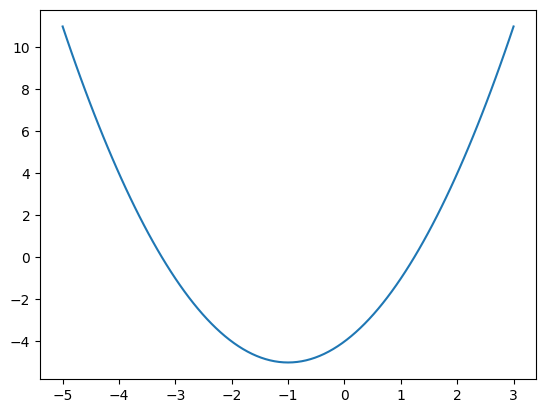

In [77]:
x = np.linspace(-5, 3, 101)
y = x**2 + 2 * x - 4
plt.plot(x, y);

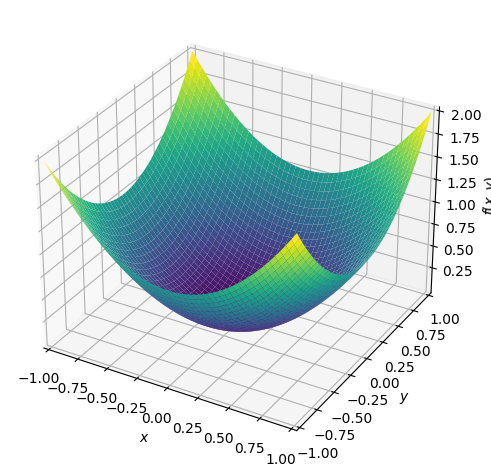

In [78]:
var('x y')
plot3d(x**2 + y**2, (x, -1, 1), (y, -1, 1));

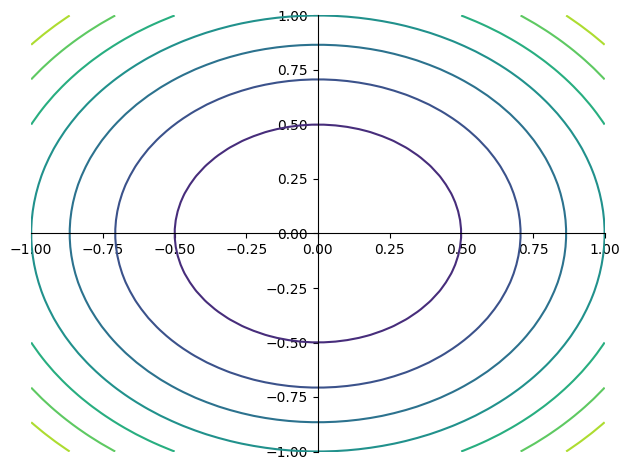

In [79]:
plotting.plot_contour(x**2 + y**2, (x, -1, 1), (y, -1, 1));

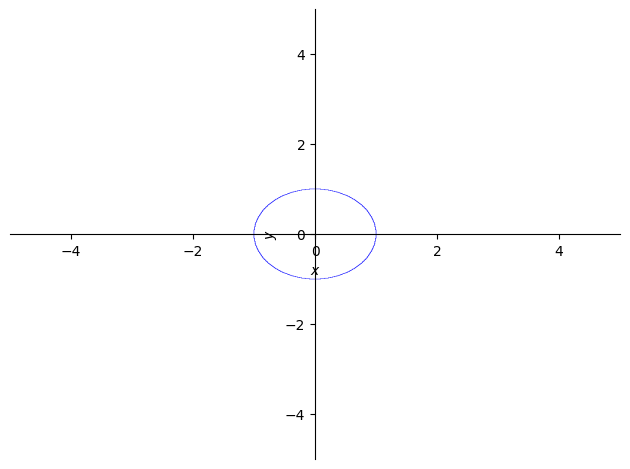

In [80]:
plot_implicit(Eq(x**2 + y**2, 1));

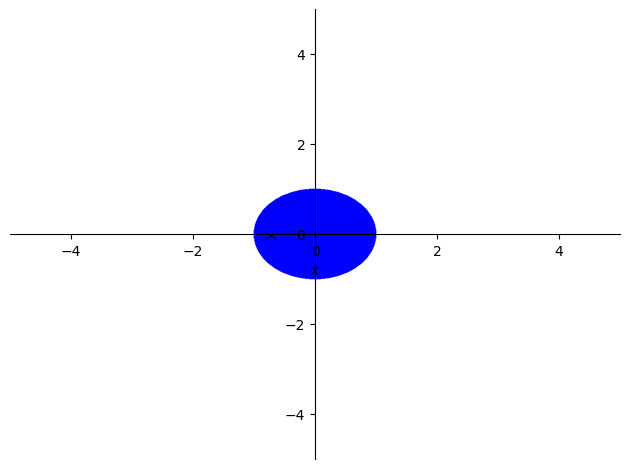

In [81]:
plot_implicit(x**2 + y**2 <= 1);

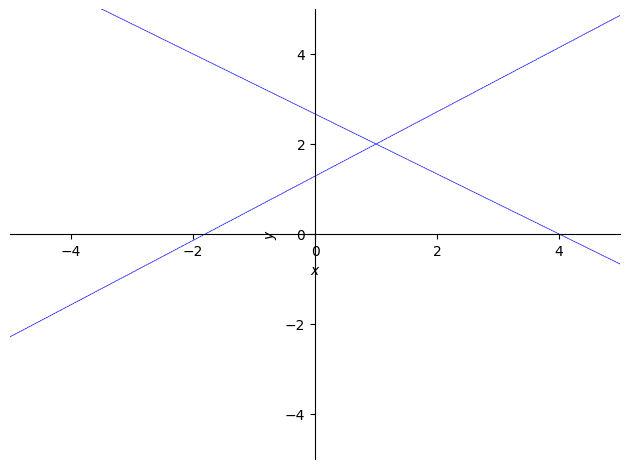

In [82]:
plot_implicit(Or(Eq(2 * x + 3 * y, 8), Eq(5 * x - 7 * y, -9)));

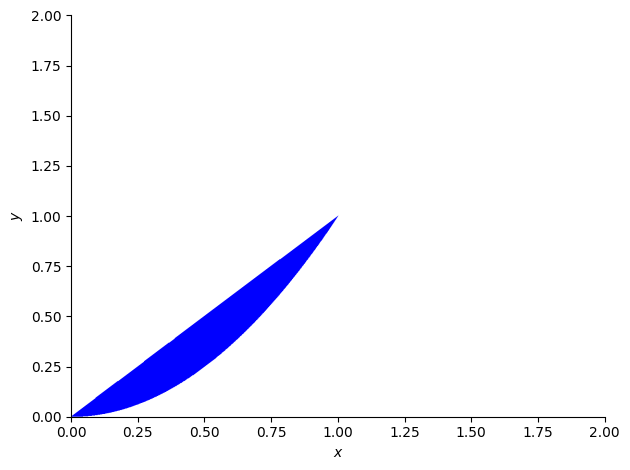

In [83]:
plot_implicit(And(y <= x, y >= x**2), (x, 0, 2), (y, 0, 2));

In [84]:
var('x')
a, b = sorted(solve(Eq(x, x**2), x))
integrate(x - x**2, (x, a, b))

1/6

In [85]:
var('x')
solve(Eq(x**2 + 2 * x - 4, 0), x)

[-1 + sqrt(5), -sqrt(5) - 1]

In [86]:
a, b = solve(x**2 + 2 * x - 4, x)
a + b

-2

In [87]:
n = 3; simplify(sum(solve(x**n + 2 * x - 4, x)))

0

In [88]:
var('x y')
sol = solve([Eq(2 * x + 3 * y, 8), Eq(5 * x - 7 * y, -9)], [x, y]); sol

{x: 1, y: 2}

In [89]:
x1, y1 = sol.values()
x1 + y1

3

In [90]:
var('x'); f = 2**x + sin(x)
nsolve(f, x, 0)

-0.676181670362621

In [91]:
var('x')
solve(Lt(x**2 + 2 * x - 4, 0), x)

(x < -1 + sqrt(5)) & (-sqrt(5) - 1 < x)

# 5 論理式




# 6 1次元のデータ

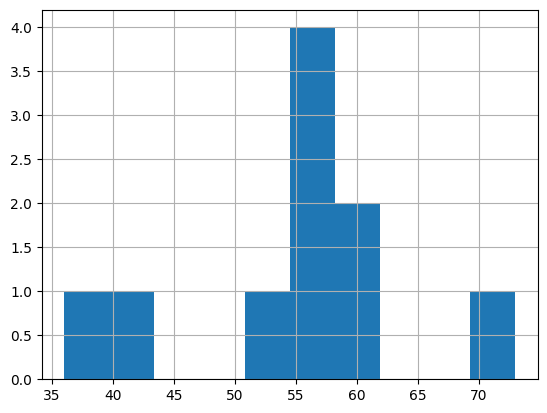

In [92]:
a = pd.Series([36, 43, 53, 55, 56, 56, 57, 60, 61, 73])
b = pd.Series([34, 39, 39, 49, 50, 52, 52, 55, 83, 97])
a.hist();

In [93]:
a.value_counts(bins=np.arange(20, 81, 20), sort=False)

(19.999, 40.0]    1
(40.0, 60.0]      7
(60.0, 80.0]      2
dtype: int64

In [94]:
x = [7, 3, 1, 3, 4, 7, 7, 7, 10, 3]
f = Counter(x); f

Counter({7: 4, 3: 3, 1: 1, 4: 1, 10: 1})

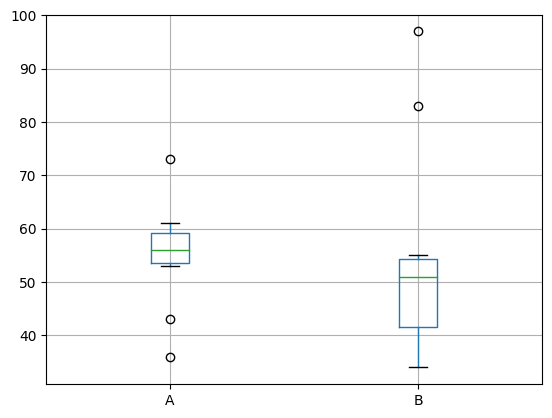

In [95]:
pd.DataFrame({'A':a, 'B':b}).boxplot();

In [96]:
a = pd.Series([36, 43, 53, 55, 56, 56, 57, 60, 61, 73])
a.mean()

55.0

In [97]:
b = pd.Series([34, 39, 39, 49, 50, 52, 52, 55, 83, 97])
sum(b) / len(b), b.sum() / b.count() # 二つの方法

(55.0, 55.0)

In [98]:
(a - a.mean()).mean()

0.0

In [99]:
a.var(ddof=1)

100.0

In [100]:
sum((b - b.mean())**2) / (len(b) - 1)

397.77777777777777

In [101]:
z = stats.zscore(a, ddof=1); z

0   -1.9
1   -1.2
2   -0.2
3    0.0
4    0.1
5    0.1
6    0.2
7    0.5
8    0.6
9    1.8
dtype: float64

In [102]:
z.mean(), z.std(ddof=1)

(2.2204460492503132e-17, 1.0)

In [103]:
(a - a.mean()) / a.std(ddof=1)

0   -1.9
1   -1.2
2   -0.2
3    0.0
4    0.1
5    0.1
6    0.2
7    0.5
8    0.6
9    1.8
dtype: float64

In [104]:
a.std(ddof=1) * z + a.mean()

0    36.0
1    43.0
2    53.0
3    55.0
4    56.0
5    56.0
6    57.0
7    60.0
8    61.0
9    73.0
dtype: float64

In [105]:
10 * z + 50

0    31.0
1    38.0
2    48.0
3    50.0
4    51.0
5    51.0
6    52.0
7    55.0
8    56.0
9    68.0
dtype: float64

# 7 2次元のデータ

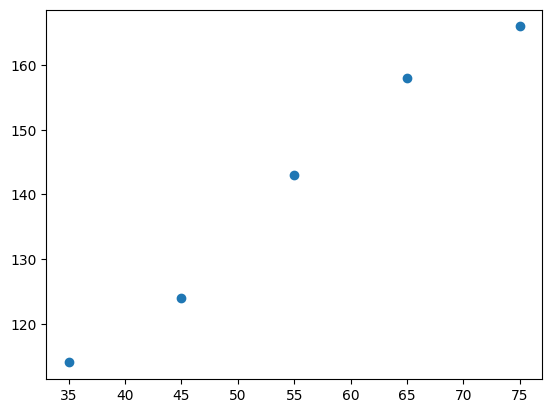

In [106]:
x = pd.Series([35, 45, 55, 65, 75])
y = pd.Series([114, 124, 143, 158, 166])
plt.scatter(x, y);

In [107]:
x = pd.Series([35, 45, 55, 65, 75])
y = pd.Series([114, 124, 143, 158, 166])
x.cov(y, ddof=1), np.cov(x, y, ddof=1)[0, 1] # 二つの方法

(345.0, 345.0)

In [108]:
np.cov(x, y, ddof=1)

array([[250., 345.],
       [345., 484.]])

In [109]:
(x - x.mean()) @ (y - y.mean()) / (len(x) - 1)

345.0

In [110]:
x.corr(y), np.corrcoef(x, y)[0, 1] # 二つの方法

(0.991805266143719, 0.991805266143719)

In [111]:
x = pd.Series([35, 45, 55, 65, 75])
y = pd.Series([114, 124, 143, 158, 166])
data = pd.DataFrame({'x': x, 'y': y})
model = smf.ols('y ~ x', data).fit()
model.params

Intercept    65.10
x             1.38
dtype: float64

In [112]:
model.predict({'x': 40})

0    120.3
dtype: float64

<Axes: >

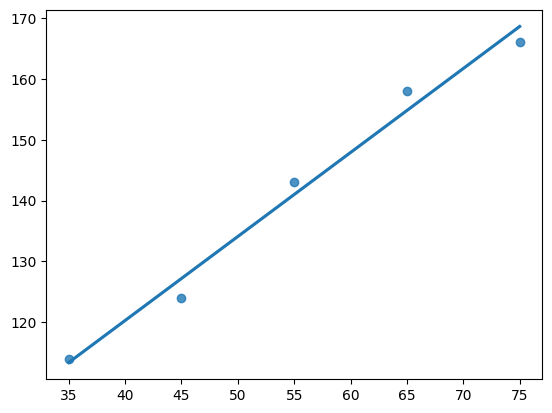

In [113]:
sns.regplot(x=x, y=y, ci=None)

In [114]:
var('a b'); L = sum((y - (a * x + b))**2); L

(-75*a - b + 166)**2 + (-65*a - b + 158)**2 + (-55*a - b + 143)**2 + (-45*a - b + 124)**2 + (-35*a - b + 114)**2

In [115]:
vars = var('p q r s t u')
sol = solve(Eq(L, p * (a - q)**2 + r * (b - (s* a + t))**2 + u), vars)
print(sol)
q.subs(sol), (s * q + t).subs(sol)

{p: 1000, q: 69/50, r: 5, s: -55, t: 141, u: 158/5}


(69/50, 651/10)

In [116]:
a = x.cov(y, ddof=1) / x.var(ddof=1)
b = y.mean() - a * x.mean()
a, b

(1.38, 65.10000000000001)

0.81642051634484
Intercept    3.000091
x            0.500091
dtype: float64


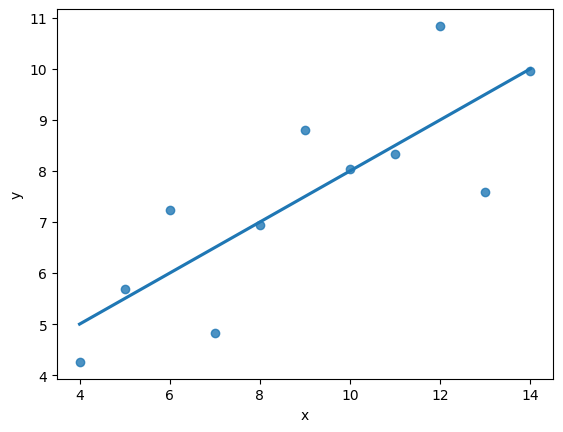

In [117]:
anscombe = sns.load_dataset('anscombe')
data = anscombe[anscombe.dataset == 'I']
print(data.x.corr(data.y))
model = smf.ols('y ~ x', data).fit(); print(model.params)
sns.regplot(x=data.x, y=data.y, ci=None);

# 8 確率変数と確率分布

In [118]:
X = DiscreteUniform('X', range(1, 7)) # X = Die('X', 6)でもよい．
density(X)(2)

1/6

In [119]:
rv = stats.randint(1, 7)
rv.pmf(2)

0.16666666666666666

In [120]:
P(Eq(X, 2)) # P(X == 2)ではない．

1/6

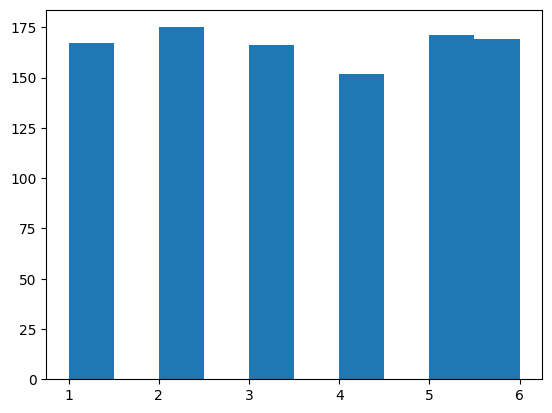

In [121]:
data = list(sample_iter(X, numsamples=1000))
plt.hist(data); # 結果は割愛

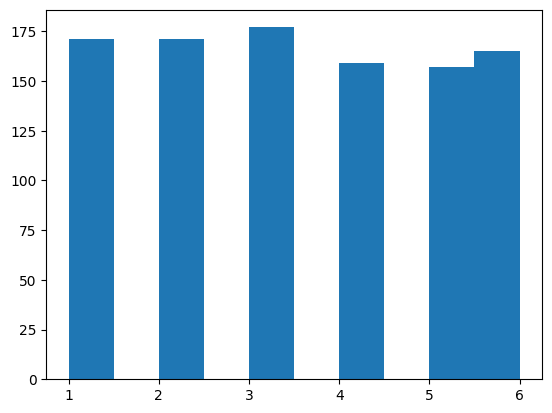

In [122]:
data = rv.rvs(size=1000)
plt.hist(data); # 結果は割愛

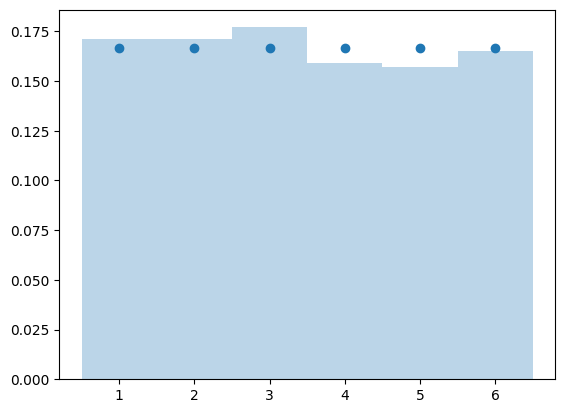

In [123]:
x = range(1, 7); y = [density(X)(x) for x in x]
_, ax = plt.subplots() # 結果のうち，使わない部分を_とする．
ax.hist(data, bins=np.arange(0.5, 7, 1), density=True, alpha=0.3)
ax.scatter(x, y);

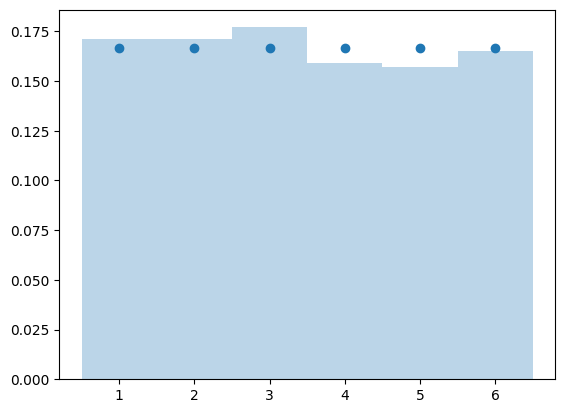

In [124]:
x = range(1, 7); y = rv.pmf(x)
_, ax = plt.subplots() # 結果のうち，使わない部分を_とする．
ax.hist(data, bins=np.arange(0.5, 7, 1), density=True, alpha=0.3)
ax.scatter(x, y);

In [125]:
X = Bernoulli('X', p=sym.S(3) / 10)
data = list(sample_iter(X, numsamples=1000))
np.bincount(data), Counter(data) # 二つの方法

(array([685, 315]), Counter({0: 685, 1: 315}))

In [126]:
rv = stats.bernoulli(3 / 10)
data = rv.rvs(1000)
np.bincount(data), Counter(data) # 二つの方法

(array([690, 310]), Counter({0: 690, 1: 310}))

In [127]:
X = Binomial('X', 10, sym.S(3) / 10)
density(X)(3)

66706983/250000000

In [128]:
rv = stats.binom(10, 3 / 10)
rv.pmf(3)

0.26682793199999977

In [129]:
P(Eq(X, 3)) # P(X == 3)ではない．

66706983/250000000

In [130]:
var('n p x')
X = Binomial('X', n, p)
density(X)(x)

Piecewise((p**x*(1 - p)**(n - x)*binomial(n, x), Contains(x, Integers) & (n >= x) & (x >= 0)), (0, True))

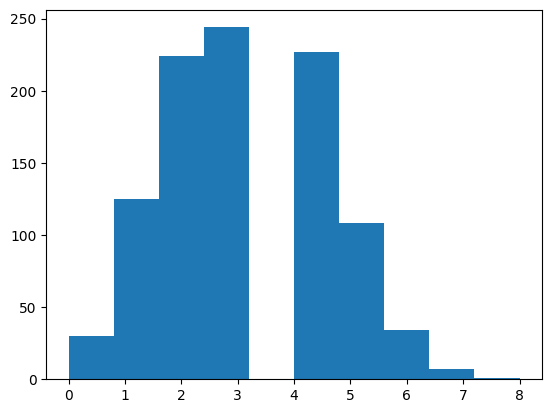

In [131]:
n = 10; p = sym.S(3) / 10; X = Binomial('X', n, p)
data = list(sample_iter(X, numsamples=1000))
plt.hist(data); # 結果は割愛

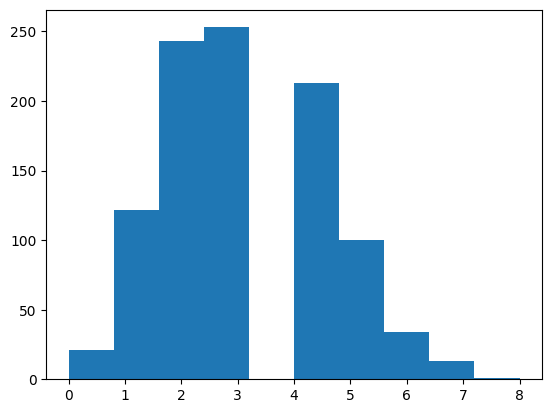

In [132]:
n = 10; p = 3 / 10; rv = stats.binom(n, p)
data = rv.rvs(1000)
plt.hist(data); # 結果は割愛

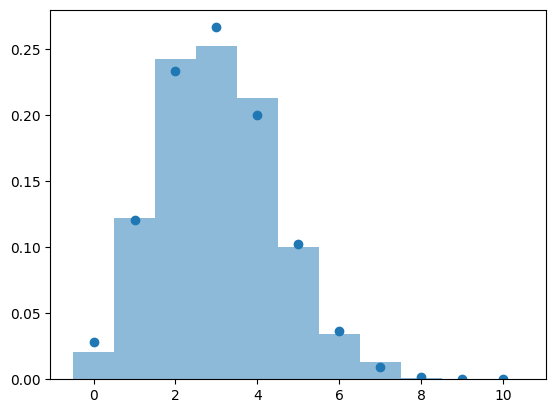

In [133]:
x = range(0, n + 1); y = [density(X)(x) for x in x]
_, ax = plt.subplots()
ax.hist(data, bins=np.arange(-0.5, n + 1, 1), density=True, alpha=0.5)
ax.scatter(x, y);

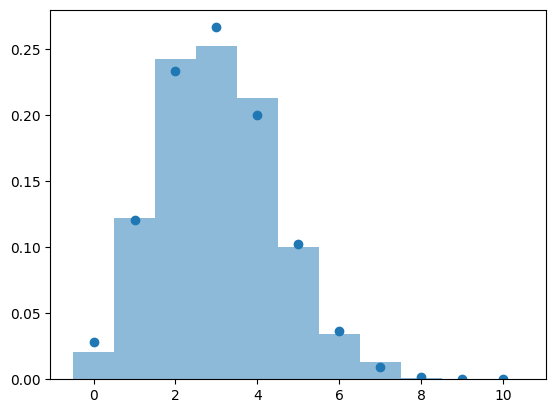

In [134]:
x = range(0, n + 1); y = rv.pmf(x)
_, ax = plt.subplots()
ax.hist(data, bins=np.arange(-0.5, n + 1, 1), density=True, alpha=0.5)
ax.scatter(x, y);

In [135]:
X = Binomial('X', 10, S(3) / 10)
cdf(X)[3] # cdf(X)(x)ではない．

406006699/625000000

In [136]:
rv = stats.binom(10, 3 / 10)
rv.cdf(3)

0.6496107184000002

In [137]:
P(X <= 3)

406006699/625000000

In [138]:
sum([density(X)(k) for k in range(4)])

406006699/625000000

In [139]:
sum([rv.pmf(k) for k in range(4)])

0.6496107183999997

In [140]:
X = Uniform('X', 0, 360)
cdf(X)(200), cdf(X)(150), cdf(X)(200) - cdf(X)(150)

(5/9, 5/12, 5/36)

In [141]:
rv = stats.uniform(0, 360)
rv.cdf(200), rv.cdf(150), rv.cdf(200) - rv.cdf(150)

(0.5555555555555556, 0.4166666666666667, 0.1388888888888889)

In [142]:
# P(150 <= X <= 200)やP(150 <= X and X <= 200)ではない．
P(And(150 <= X, X <= 200))

5/36

In [143]:
var('x'); integrate(density(X)(x), (x, 150, 200))

5/36

In [144]:
quad(rv.pdf, 150, 200)

(0.1388888888888889, 1.5419764230904952e-15)

In [145]:
var('t x'); integrate(density(X)(t), (t, 0, x))

Piecewise((0, x < 0), (Min(360, x)/360, True))

In [146]:
diff(x / 360, x)

1/360

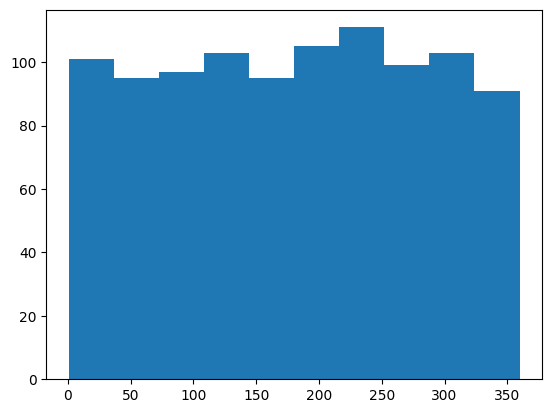

In [147]:
data = list(sample_iter(X, numsamples=1000))
plt.hist(data); # 結果は割愛

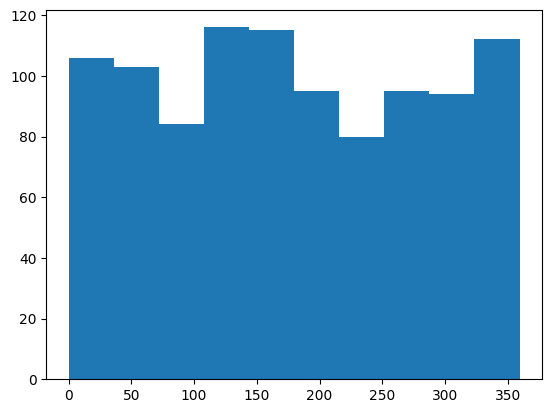

In [148]:
data = rv.rvs(1000)
plt.hist(data); # 結果は割愛

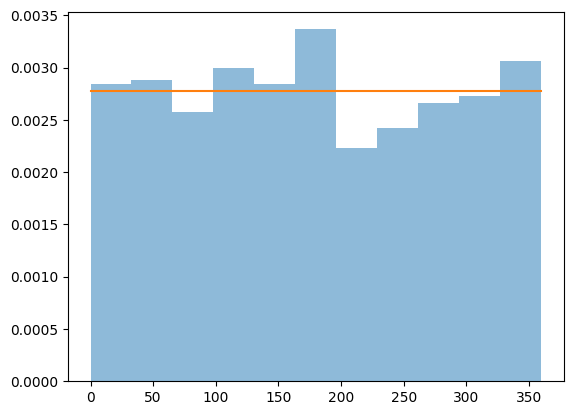

In [149]:
x = np.linspace(0, 360, 100); y = [density(X)(x) for x in x]
_, ax = plt.subplots()
ax.hist(data, bins='sturges', density=True, alpha=0.5)
ax.plot(x, y);

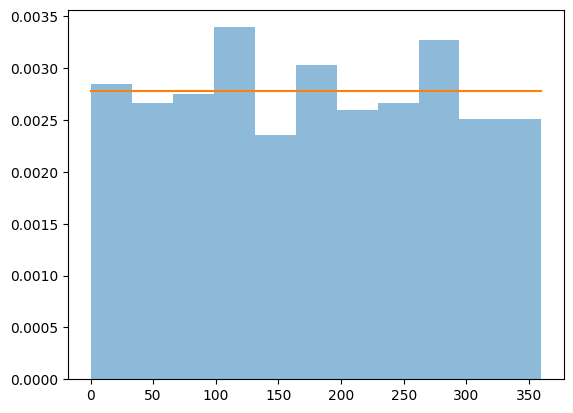

In [150]:
data = rv.rvs(1000)
x = np.linspace(0, 360, 100); y = rv.pdf(x)
_, ax = plt.subplots()
ax.hist(data, bins='sturges', density=True, alpha=0.5)
ax.plot(x, y);

In [151]:
X = Normal('X', 6, 2)
N((cdf(X)(6 + 3 * 2) - cdf(X)(6 - 3 * 2)))

0.997300203936740

In [152]:
rv = stats.norm(6, 2)
rv.cdf(6 + 3 * 2) - rv.cdf(6 - 3 * 2)

0.9973002039367398

In [153]:
#P(6 - 3 * 2 <= X <= 6 + 3 * 2)ではない．
#P(6 - 3 * 2 <= X and X <= 6 + 3 * 2)ではない．
N(P(And(6 - 3 * 2 <= X, X <= 6 + 3 * 2)))

0.997300203936740

In [154]:
var('x')
N(integrate(density(X)(x), (x, 6 - 3 * 2, 6 + 3 * 2)))

0.997300203936740

In [155]:
quad(rv.pdf, 6 - 3 * 2, 6 + 3 * 2)

(0.9973002039367399, 1.1072256503105314e-14)

In [156]:
var('mu sigma x'); X = Normal('X', mu, sigma)
a, b = mu - 3 * sigma, mu + 3 * sigma
(N((cdf(X)(b) - cdf(X)(a))),             # 方法1
 N(integrate(density(X)(x), (x, a, b)))) # 方法3

(0.997300203936740, 0.997300203936740)

In [157]:
var('mu sigma x')
X = Normal('X', mu, sigma)
density(X)(x)

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

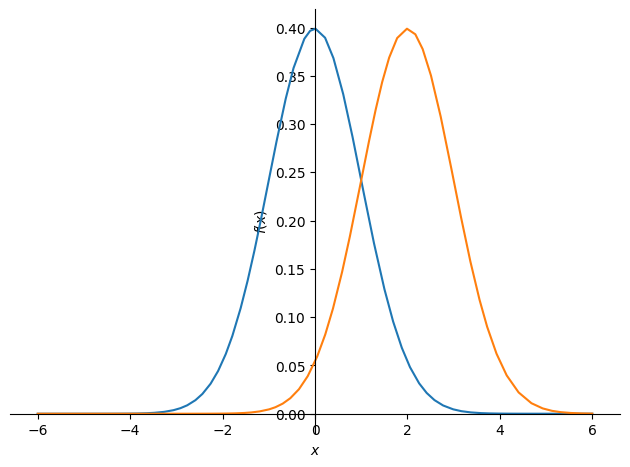

In [158]:
X1 = Normal('X1', 0, 1); X2 = Normal('X2', 2, 1); var('x')
plot(density(X1)(x), density(X2)(x), (x, -6, 6));

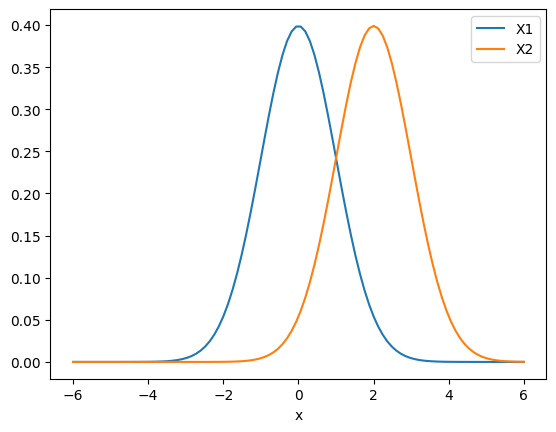

In [159]:
rv1 = stats.norm(0, 1); rv2 = stats.norm(2, 1); x = np.linspace(-6, 6, 100)
pd.DataFrame({'x': x, 'X1': rv1.pdf(x), 'X2': rv2.pdf(x)}).plot(x='x');

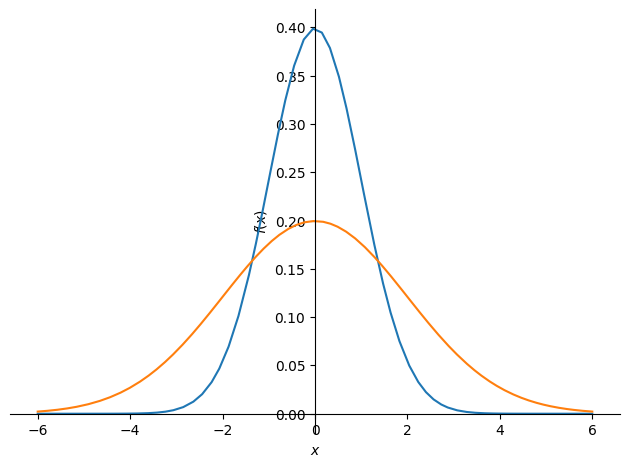

In [160]:
X3 = Normal('X3', 0, 2); var('x')
plot(density(X1)(x), density(X3)(x), (x, -6, 6));

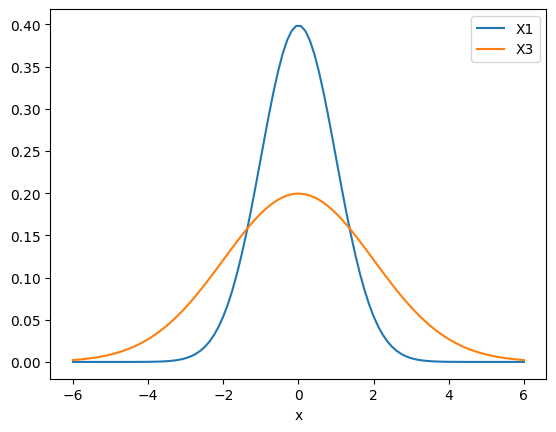

In [161]:
rv3 = stats.norm(0, 2); x = np.linspace(-6, 6, 100)
pd.DataFrame({'x': x, 'X1': rv1.pdf(x), 'X3': rv3.pdf(x)}).plot(x='x');

In [162]:
Xs = [0, 100, 1000, 10000]; tmp = [0.9, 0.08, 0.015, 0.005]
Ps = np.array(tmp) / sum(tmp) # 念のため合計を1にする．
X = FiniteRV('X', dict(zip(Xs, Ps))) # 確率分布の定義
data = sample_iter(X, numsamples=1000)
Counter(data)

Counter({0: 885, 100: 85, 1000: 22, 10000: 8})

In [163]:
Xs = [0, 100, 1000, 10000]; tmp = [0.9, 0.08, 0.015, 0.005]
Ps = np.array(tmp) / sum(tmp) # 念のため合計を1にする．
rv = stats.rv_discrete(values=(Xs, Ps)) # 確率分布の定義
data = rv.rvs(size=1000)
Counter(data)

Counter({0: 906, 100: 77, 1000: 14, 10000: 3})

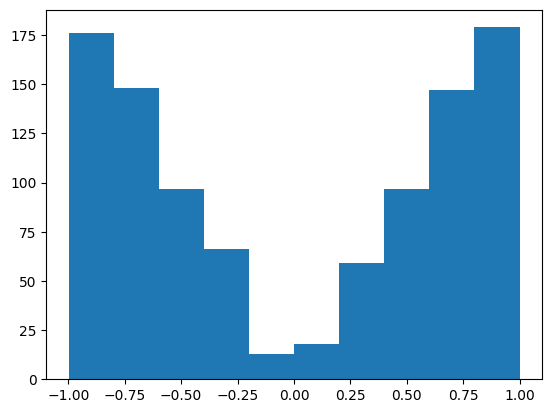

In [164]:
var('x')
f = Lambda(x, Abs(x)); a, b = -1, 1;
s = integrate(f(x), (x, a, b)) # “全確率”
X = ContinuousRV(x,            # 確率分布の定義
                 f(x) / s,     # 念のため“全確率”で割る．
                 set=Interval(a, b))
data = list(sample_iter(X, numsamples=1000))
plt.hist(data);

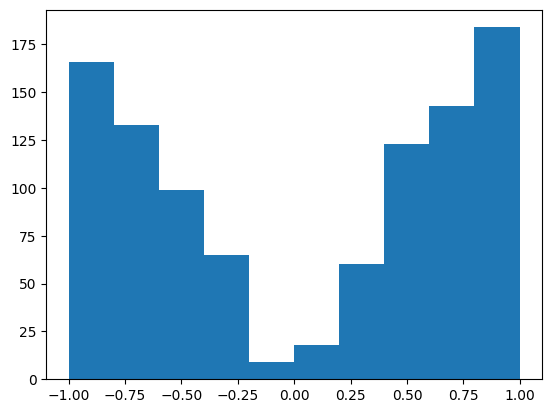

In [165]:
f = lambda x: abs(x); a, b = -1, 1;
s = quad(f, a, b)[0]                   # “全確率”
class MyX(stats.rv_continuous):        # 確率分布の定義の準備
    def _pdf(self, x): return f(x) / s # 念のため“全確率”で割る．
rv = MyX(a=a, b=b)                     # 確率分布の定義
data = rv.rvs(size=1000)
plt.hist(data);

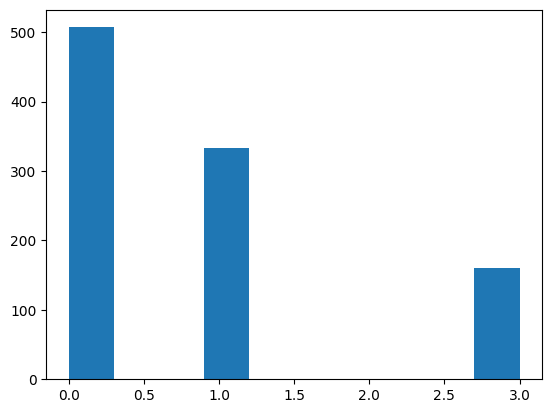

In [166]:
X = DiscreteUniform('X', range(1, 7))
Y = X**3 % 4
data = list(sample_iter(Y, numsamples=1000))
plt.hist(data);

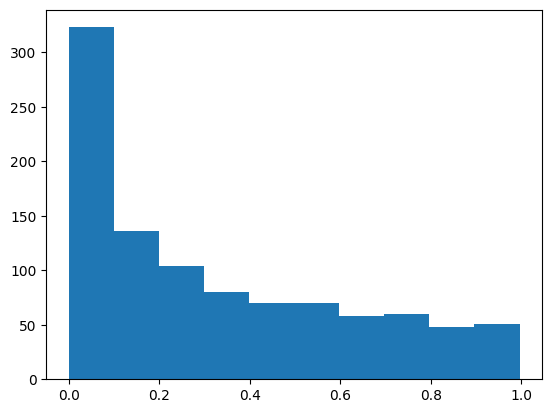

In [167]:
X = Uniform('X', 0, 1)
Y = X**2
data = list(sample_iter(Y, numsamples=1000))
plt.hist(data);

In [168]:
simplify(density(Y))

Lambda(_y, Piecewise((1/Abs(sqrt(_y)), Eq(sqrt(_y), 0) & (sqrt(_y) <= 1)), (1/(2*Abs(sqrt(_y))), (sqrt(_y) >= -1) & (sqrt(_y) <= 1)), (0, True)))

In [169]:
var('a b mu sigma'); X = Normal('X', mu, sigma); Y = a * X + b
simplify(density(Y))

Lambda(_y, sqrt(2)*exp(-(-_y + a*mu + b)**2/(2*a**2*sigma**2))/(2*sqrt(pi)*sigma*Abs(a)))

In [170]:
Xs = [0, 100, 1000, 10000]; Ps = [0.9, 0.08, 0.015, 0.005]
X = FiniteRV('X', dict(zip(Xs, Ps)))
E(X)

73.0000000000000

In [171]:
Xs = [0, 100, 1000, 10000]; Ps = [0.9, 0.08, 0.015, 0.005]
rv = stats.rv_discrete(values=(Xs, Ps))
rv.mean()

73.0

In [172]:
sum(x * density(X)[x] for x in Xs)

73.0000000000000

In [173]:
sum(x * rv.pmf(x) for x in Xs)

73.0

In [174]:
np.dot(Xs, Ps)

73.0

In [175]:
np.mean(list(sample_iter(X, numsamples=500000)))

74.1328

In [176]:
rv.rvs(size=500000).mean()

73.7662

In [177]:
var('x')
X = ContinuousRV(x, Abs(x), set=Interval(-1, 1))
integrate(x * density(X)(x), (x, -1, 1))

0

In [178]:
class MyX(stats.rv_continuous):
    def _pdf(self, x): return abs(x)
rv = MyX(a=-1, b=1)
quad(lambda x: x * rv.pdf(x), -1, 1)

(0.0, 7.401486830834376e-15)

In [179]:
Xs = [0, 100, 1000, 10000]; Ps = [0.9, 0.08, 0.015, 0.005]
X = FiniteRV('X', dict(zip(Xs, Ps)))
variance(X)

510471.000000000

In [180]:
Xs = [0, 100, 1000, 10000]; Ps = [0.9, 0.08, 0.015, 0.005]
rv = stats.rv_discrete(values=(Xs, Ps))
rv.var()

510471.0

In [181]:
E((X - E(X))**2)

510471.000000000

In [182]:
sum((x - E(X))**2 * density(X)[x] for x in Xs)

510471.000000000

In [183]:
sum((x - rv.mean())**2 * rv.pmf(x) for x in Xs)

510471.0

In [184]:
np.dot((Xs - np.dot(Xs, Ps))**2, Ps)

510471.0

In [185]:
var('x')
X = ContinuousRV(x, Abs(x), set=Interval(-1, 1))
integrate((x - E(X))**2 * density(X)(x), (x, -1, 1))

1/2

In [186]:
class MyX(stats.rv_continuous):
    def _pdf(self, x): return abs(x)
rv = MyX(a=-1, b=1)
quad(lambda x: (x - rv.mean())**2 * rv.pdf(x), -1, 1)

(0.5000000000000001, 5.551115123125783e-15)

# 9 多次元の確率分布

In [187]:
X1 = DiscreteUniform('X1', range(1, 7))
X2 = DiscreteUniform('X2', range(1, 7))
X, Y = Max(X1, X2), Min(X1, X2)
{(x, y): P(And(Eq(X, x), Eq(Y, y))) for x in range(1, 7) for y in range(1, 7)}

{(1, 1): 1/36,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (1, 5): 0,
 (1, 6): 0,
 (2, 1): 1/18,
 (2, 2): 1/36,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (2, 6): 0,
 (3, 1): 1/18,
 (3, 2): 1/18,
 (3, 3): 1/36,
 (3, 4): 0,
 (3, 5): 0,
 (3, 6): 0,
 (4, 1): 1/18,
 (4, 2): 1/18,
 (4, 3): 1/18,
 (4, 4): 1/36,
 (4, 5): 0,
 (4, 6): 0,
 (5, 1): 1/18,
 (5, 2): 1/18,
 (5, 3): 1/18,
 (5, 4): 1/18,
 (5, 5): 1/36,
 (5, 6): 0,
 (6, 1): 1/18,
 (6, 2): 1/18,
 (6, 3): 1/18,
 (6, 4): 1/18,
 (6, 5): 1/18,
 (6, 6): 1/36}

In [188]:
density(X), density(Y)

({1: 1/36, 2: 1/12, 3: 5/36, 4: 7/36, 5: 1/4, 6: 11/36},
 {1: 11/36, 2: 1/4, 3: 7/36, 4: 5/36, 5: 1/12, 6: 1/36})

In [189]:
{(x, y): P(And(Le(X, x), Le(Y, y))) for x in range(1, 7) for y in range(1, 7)}

{(1, 1): 1/36,
 (1, 2): 1/36,
 (1, 3): 1/36,
 (1, 4): 1/36,
 (1, 5): 1/36,
 (1, 6): 1/36,
 (2, 1): 1/12,
 (2, 2): 1/9,
 (2, 3): 1/9,
 (2, 4): 1/9,
 (2, 5): 1/9,
 (2, 6): 1/9,
 (3, 1): 5/36,
 (3, 2): 2/9,
 (3, 3): 1/4,
 (3, 4): 1/4,
 (3, 5): 1/4,
 (3, 6): 1/4,
 (4, 1): 7/36,
 (4, 2): 1/3,
 (4, 3): 5/12,
 (4, 4): 4/9,
 (4, 5): 4/9,
 (4, 6): 4/9,
 (5, 1): 1/4,
 (5, 2): 4/9,
 (5, 3): 7/12,
 (5, 4): 2/3,
 (5, 5): 25/36,
 (5, 6): 25/36,
 (6, 1): 11/36,
 (6, 2): 5/9,
 (6, 3): 3/4,
 (6, 4): 8/9,
 (6, 5): 35/36,
 (6, 6): 1}

In [190]:
X1 = DiscreteUniform('X1', range(1, 7))
X2 = DiscreteUniform('X2', range(1, 7))
X, Y = Max(X1, X2), Min(X1, X2)

(E(X), E(Y),               # 平均
 variance(X), variance(Y), # 分散
 std(X), std(Y),           # 標準偏差
 covariance(X, Y),         # 共分散
 correlation(X, Y))        # 相関係数

(161/36,
 91/36,
 2555/1296,
 2555/1296,
 sqrt(2555)/36,
 sqrt(2555)/36,
 1225/1296,
 35/73)

In [191]:
uX, uY = E(X), E(Y); sX, sY = std(X), std(Y)
(E(X), E(Y),                       # 平均
 E((X - uX)**2), E((Y - uY)**2),   # 分散
 E((X - uX) * (Y - uY)),           # 共分散
 E((X - uX) * (Y - uY) / sX / sY)) # 相関係数

(161/36, 91/36, 2555/1296, 2555/1296, 1225/1296, 35/73)

In [192]:
print(sum((x * P(Eq(X, x)) for x in range(1, 7))))         # 平均
print(sum((x - uX) * (y - uY) * P(And(Eq(X, x), Eq(Y, y))) # 共分散
          for x in range(1, 7) for y in range(1, 7)))

161/36
1225/1296


In [193]:
[P(And(X <= x, Y <= y)) for x in range(1, 7) for y in range(1, 7)] == \
[P(X <= x) * P(Y <= y) for x in range(1, 7) for y in range(1, 7)]

False

In [194]:
U = DiscreteUniform('X', range(1, 7)); X = U % 2; Y = U % 3
[P(And(X <= x, Y <= y)) for x in range(2) for y in range(3)] == \
[P(X <= x) * P(Y <= y) for x in range(2) for y in range(3)]

True

In [195]:
X = Binomial('X', 3, sym.S(1) / 2)
Y = Piecewise((1, Or(Eq(X, 0), Eq(X, 3))), (2, True))
covariance(X, Y)

0

In [196]:
[P(And(X <= x, Y <= y)) for x in range(4) for y in (1, 2)] == \
[P(X <= x) * P(Y <= y) for x in range(4) for y in (1, 2)]

False

In [197]:
X1 = DiscreteUniform('X1', range(1, 7))
X2 = DiscreteUniform('X2', range(1, 7))
X, Y = Max(X1, X2), Min(X1, X2)

(E(X + Y), E(X) + E(Y),                                             # 平均
 variance(X + Y), variance(X) + variance(Y) + 2 * covariance(X, Y)) # 分散

(7, 7, 35/6, 35/6)

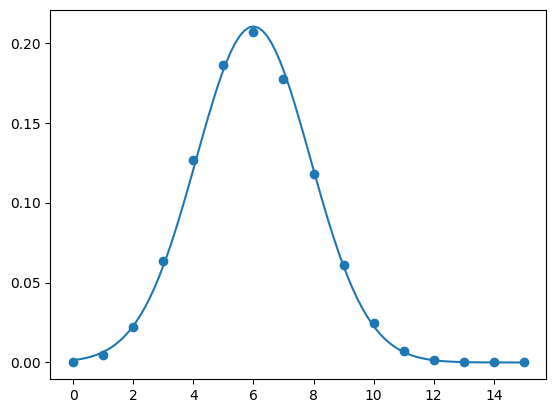

In [198]:
n = 15; p = sym.S(4) / 10; Y = Binomial('Y', n, p)
mu = E(Y); sigma = std(Y); Z = Normal('Z', mu, sigma)
x1 = range(0, n + 1); y1 = [density(Y)(x) for x in x1]
x2 = np.linspace(0, n, 101); y2 = [density(Z)(t) for t in x2]
_, ax = plt.subplots(); ax.scatter(x1, y1); ax.plot(x2, y2);

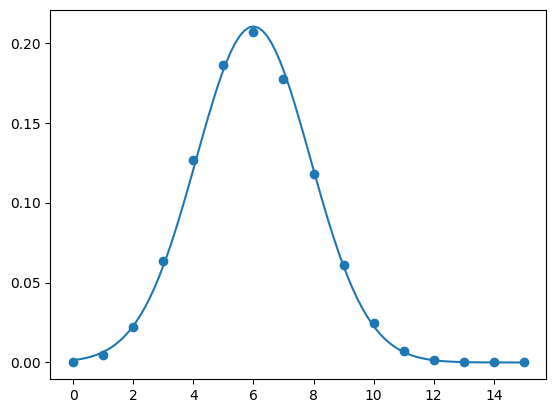

In [199]:
n = 15; p = 4 / 10; Y = stats.binom(n, p)
mu = Y.mean(); sigma = Y.std(); Z = stats.norm(mu, sigma)
x1 = range(0, n + 1); y1 = Y.pmf(x1)
x2 = np.linspace(0, n, 101); y2 = Z.pdf(x2)
_, ax = plt.subplots(); ax.scatter(x1, y1); ax.plot(x2, y2);

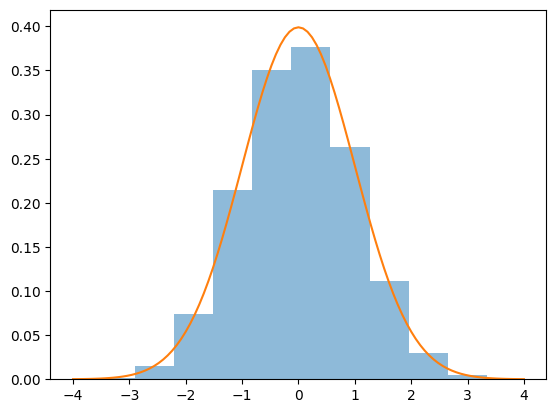

In [200]:
X = Uniform('X', 0, 1); Z = Normal('Z', 0, 1)
data = [sum(sample_iter(X, numsamples=12)) - 6 for _ in range(10000)]
x = np.linspace(-4, 4, 101); y = [density(Z)(t) for t in x]
_, ax = plt.subplots(); ax.hist(data, density=True, alpha=0.5); ax.plot(x, y);

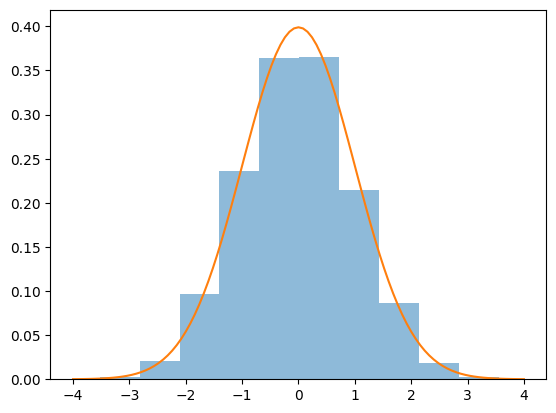

In [201]:
X = stats.uniform(); Z = stats.norm()
data = [sum(X.rvs(12)) - 6 for _ in range(10000)]
x = np.linspace(-4, 4, 101); y = Z.pdf(x)
_, ax = plt.subplots(); ax.hist(data, density=True, alpha=0.5); ax.plot(x, y);

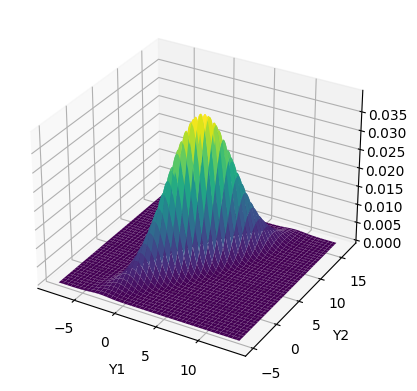

In [202]:
mu = [3, 6]; Sigma = [[5, 7], [7, 13]];
rv = stats.multivariate_normal(mu, Sigma)
Y1, Y2 = np.mgrid[-8:14:0.1, -5:17:0.1]
grid = np.dstack((Y1, Y2))
z = rv.pdf(grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y1, Y2, z, cmap='viridis')
ax.set_xlabel('Y1'); ax.set_ylabel('Y2');

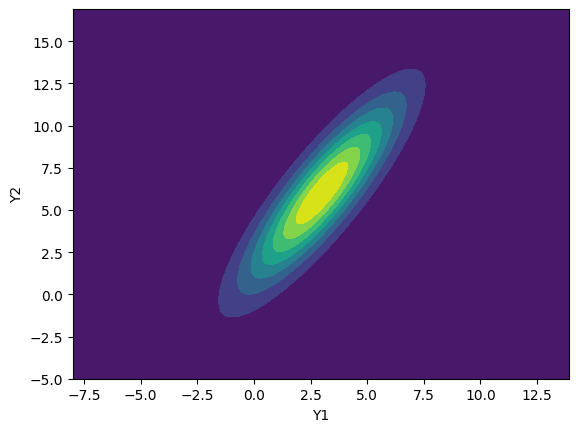

In [203]:
plt.contourf(Y1, Y2, z, cmap='viridis'); plt.xlabel('Y1'); plt.ylabel('Y2');

# 10 推測統計

In [204]:
mu = 2; sigma = 3; rv = stats.norm(mu, sigma)
data1 = [rv.rvs(5).mean() for _ in range(10000)]
data2 = [rv.rvs(50).mean() for _ in range(10000)]
((np.mean(data1), np.var(data1)), (np.mean(data2), np.var(data2)))

((1.991701216727737, 1.7643761530102193),
 (1.9972435014286642, 0.1807968457754111))

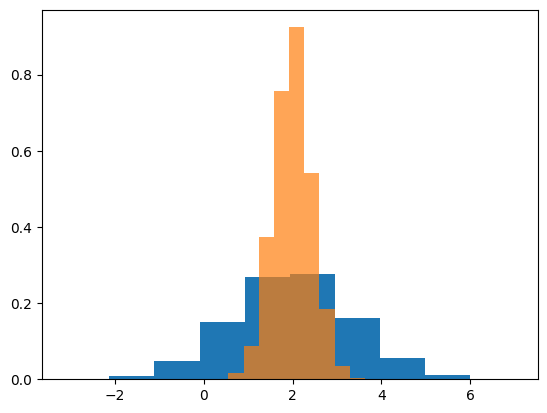

In [205]:
plt.hist(data1, density=True), plt.hist(data2, alpha=0.7, density=True);

In [206]:
mu = 2; sigma = 3; rv = stats.norm(mu, sigma)
data1 = [rv.rvs(5).var(ddof=1) for _ in range(10000)]
data2 = [rv.rvs(50).var(ddof=1) for _ in range(10000)]
((np.mean(data1), np.var(data1)), (np.mean(data2), np.var(data2)))

((9.060701993314934, 42.238898498784856),
 (8.97598927608353, 3.2334952088269344))

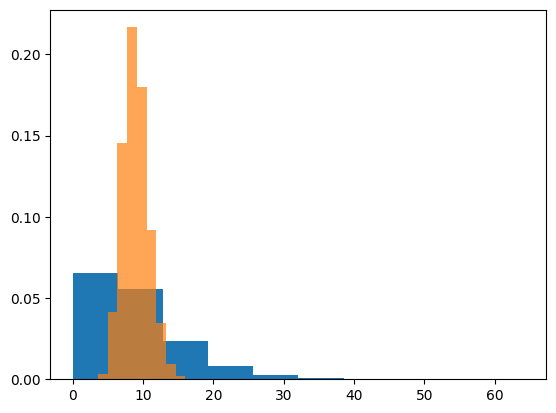

In [207]:
plt.hist(data1, density=True), plt.hist(data2, alpha=0.7, density=True);

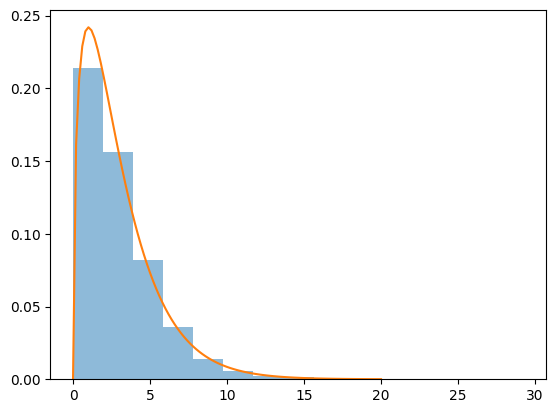

In [208]:
n = 4; mu = 5; sigma = 7; rv = stats.norm(mu, sigma)
f = lambda x: (n - 1) * x.var(ddof=1) / sigma**2
data = [f(rv.rvs(n)) for _ in range(10000)]
x = np.linspace(0, 20, 101); y = stats.chi2(n - 1).pdf(x)
_, ax = plt.subplots()
ax.hist(data, bins='sturges', density=True, alpha=0.5)
ax.plot(x, y);

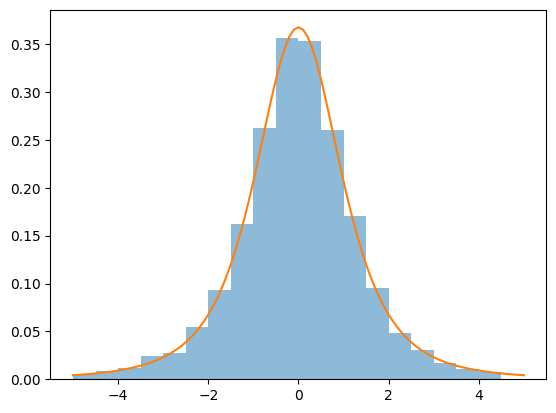

In [209]:
n = 4; mu = 5; sigma = 7; rv = stats.norm(mu, sigma)
t = lambda x: (x.mean() - mu) / np.sqrt(x.var(ddof=1) / n)
data = [t(rv.rvs(n)) for _ in range(10000)]
x = np.linspace(-5, 5, 101); y = stats.t(n - 1).pdf(x)
_, ax = plt.subplots()
ax.hist(data, density=True, bins=np.arange(-5, 5, 0.5), alpha=0.5)
ax.plot(x, y);

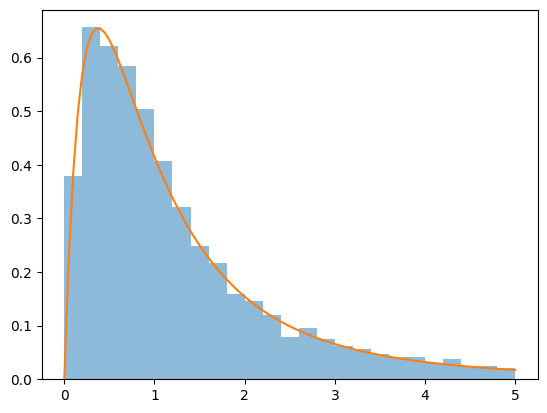

In [210]:
m = 5; muX = 2; sigmaX = 3; rvX = stats.norm(muX, sigmaX)
n = 7; muY = 3; sigmaY = 2; rvY = stats.norm(muY, sigmaY)
f = lambda x, y: (x.var(ddof=1) / sigmaX**2) / (y.var(ddof=1) / sigmaY**2)
data = [f(rvX.rvs(m), rvY.rvs(n)) for _ in range(10000)]
x = np.linspace(0, 5, 101); y = stats.f(m - 1, n - 1).pdf(x)
_, ax = plt.subplots()
ax.hist(data, density=True, bins=np.arange(0, 5.2, 0.2), alpha=0.5)
ax.plot(x, y);

In [211]:
n = 15; p0 = 4 / 10; binom_test(2, 15, 4 / 10)

0.036461661552639996

In [212]:
binom_test(2, n, p0, alternative="smaller")

0.02711400077721599

In [213]:
n = 15; p0 = 4 / 10; mu0 = n * p0; sigma0 = np.sqrt((n * p0 * (1 - p0)))
2 * stats.norm.cdf(2, mu0, sigma0)

0.03501498101966249

In [214]:
alpha = 5 / 100; stats.norm.ppf((alpha/2, 1 - alpha/2), mu0, sigma0)

array([2.28122981, 9.71877019])

In [215]:
x = [24.2, 25.3, 26.2, 25.7, 24.4, 25.1, 25.6]; d = DescrStatsW(x); mu0 = 25
d.ttest_mean(mu0)

(0.7927746338725384, 0.45810123945171854, 6.0)

In [216]:
m = np.mean(x); s2 = np.var(x, ddof=1); n = len(x);
t = (m - mu0) / np.sqrt(s2 / n); c = stats.t.cdf(t, n - 1)
2 * min(c, 1 - c)

0.45810123945171854

In [217]:
alpha = 5 / 100
stats.t.ppf((alpha / 2, 1 - alpha / 2), n - 1)

array([-2.44691185,  2.44691185])

In [218]:
d.tconfint_mean()

(24.552889359118268, 25.875682069453163)

In [219]:
x = [25, 24, 25, 26]; y = [23, 18, 22, 28, 17, 25, 19, 16]
ttest_ind(x, y, alternative="larger", usevar='unequal')

(2.592296279363144, 0.016019447664945313, 7.987828071510078)

In [220]:
tmp = CompareMeans(DescrStatsW(x), DescrStatsW(y))
tmp.tconfint_diff(alternative="larger", usevar='unequal')

(1.130088155079378, inf)

In [221]:
x = [25, 24, 25, 26]; y = [23, 18, 22, 28, 17, 25, 19, 16]
f = np.var(x, ddof=1) / np.var(y, ddof=1); m = len(x); n = len(y);
c = stats.f.cdf(f, m - 1, n - 1)
f, 2 * min(c, 1 - c)

(0.03763440860215053, 0.02121497132629376)

In [222]:
alpha = 0.05
stats.f.ppf((alpha / 2, 1 - alpha / 2), m - 1, n - 1)

array([0.0683789 , 5.88981917])

# 11 線形回帰分析

In [223]:
data = pd.DataFrame({
    'x1': [1, 1, 2, 3], 'x2': [2, 3, 5, 7], 'y': [3, 6, 3, 6]})
model = smf.ols('y ~ x1 + x2', data).fit()
print(model.summary2(alpha=0.05))
#                 Results: Ordinary least squares
# ================================================================
# Model:              OLS              Adj. R-squared:     -1.000
# Dependent Variable: y                AIC:                18.9734
# Date:               2023-01-01 00:00 BIC:                17.1323
# No. Observations:   4                Log-Likelihood:     -6.4867
# Df Model:           2                F-statistic:        0.2500
# Df Residuals:       1                Prob (F-statistic): 0.816
# R-squared:          0.333            Scale:              6.0000
# -----------------------------------------------------------------
#             Coef.   Std.Err.     t     P>|t|     [0.025    0.975]
# -----------------------------------------------------------------
# const       3.0000    3.0000   1.0000  0.5000   -35.1186  41.1186
# x1         -4.0000    7.6811  -0.5208  0.6943  -101.5982  93.5982
# x2          2.0000    3.3166   0.6030  0.6545   -40.1417  44.1417
# ----------------------------------------------------------------
# Omnibus:              nan          Durbin-Watson:          3.167
# Prob(Omnibus):        nan          Jarque-Bera (JB):       0.611
# Skew:                 -0.816       Prob(JB):               0.737
# Kurtosis:             2.000        Condition No.:          35
# ================================================================

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -1.000 
Dependent Variable: y                AIC:                18.9734
Date:               2024-03-13 06:04 BIC:                17.1323
No. Observations:   4                Log-Likelihood:     -6.4867
Df Model:           2                F-statistic:        0.2500 
Df Residuals:       1                Prob (F-statistic): 0.816  
R-squared:          0.333            Scale:              6.0000 
-----------------------------------------------------------------
            Coef.   Std.Err.     t     P>|t|     [0.025    0.975]
-----------------------------------------------------------------
Intercept   3.0000    3.0000   1.0000  0.5000   -35.1186  41.1186
x1         -4.0000    7.6811  -0.5208  0.6943  -101.5982  93.5982
x2          2.0000    3.3166   0.6030  0.6545   -40.1417  44.1417
----------------------------------------------------------------
Omnibus:              nan          D

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [224]:
model.predict({'x1': 1.5, 'x2': 4})

0    5.0
dtype: float64

In [225]:
x1 = np.array([1, 3, 6, 10]); y = np.array([7, 1, 6, 14])
def L(b):
    e = y - (b[0] + b[1] * x1)
    return e @ e # 内積
minimize(L, x0=[0, 0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 40.00000000000007
        x: [ 2.000e+00  1.000e+00]
      nit: 8
      jac: [ 4.768e-07  0.000e+00]
 hess_inv: [[ 3.969e-01 -5.436e-02]
            [-5.436e-02  1.088e-02]]
     nfev: 27
     njev: 9

In [226]:
data = pd.DataFrame({
    'x1': [1, 1, 2, 3], 'x2': [2, 3, 5, 7], 'y': [3, 6, 3, 6]})
y, X = dmatrices('y ~ x1 + x2', data)
linalg.inv(X.T @ X) @ X.T @ y

array([[ 3.],
       [-4.],
       [ 2.]])

In [227]:
linalg.pinv(X) @ y

array([[ 3.],
       [-4.],
       [ 2.]])

In [228]:
data = pd.DataFrame({
    'x1': [1, 1, 2, 3], 'x2': [2, 3, 5, 7], 'y': [3, 6, 3, 6]})
model = smf.ols('y ~ x1 + x2', data).fit()
model.rsquared

0.33333333333333337

In [229]:
model.rsquared_adj

-1.0

In [230]:
x1 = [1, 3, 6, 10]; y = [7, 1, 6, 14]
data = pd.DataFrame({'x1': x1, 'y': y})
_, X = dmatrices('y ~ x1', data)
yh = X @ linalg.pinv(X) @ y
eh = y - yh; fh = yh - np.mean(y); g = y - np.mean(y)
R2 = 1 - np.dot(eh, eh) / np.dot(g, g); R2

0.5348837209302326

In [231]:
(np.allclose(eh.mean(), 0),                                  # 特徴1
 np.allclose(yh.mean(), data.y.mean()),                      # 特徴2
 np.allclose(np.dot(g, g), np.dot(fh, fh) + np.dot(eh, eh)), # 特徴3
 np.allclose(R2, np.dot(fh, fh) / np.dot(g, g)),             # 特徴4
 np.allclose(R2, np.corrcoef(y, yh)[0, 1]**2),               # 特徴5
 0 <= R2 <= 1,                                               # 特徴6
 np.allclose(np.corrcoef(y, yh), np.corrcoef(y, x1)))        # 特徴7

(True, True, True, True, True, True, True)

In [232]:
data = pd.DataFrame({
    'x1': [1, 1, 2, 3], 'x2': [2, 3, 5, 7], 'y': [3, 6, 3, 6]})
model = smf.ols('y ~ x1 + x2', data).fit()
model.scale

6.0

In [233]:
data = pd.DataFrame({
    'x1': [1, 1, 2, 3], 'x2': [2, 3, 5, 7], 'y': [3, 6, 3, 6]})
model = smf.ols('y ~ x1 + x2', data).fit()
model.f_pvalue

0.8164965809277263

In [234]:
data = pd.DataFrame({'x1': [35, 45, 55, 65, 75],
                     'y': [114, 124, 143, 158, 166]})
model = smf.ols('y ~ x1', data).fit()
print(model.summary2(alpha=0.05)) # 信頼区間はこのレポートにも表示される．
model.conf_int(alpha=0.05)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.978   
Dependent Variable: y                AIC:                27.4080 
Date:               2024-03-13 06:04 BIC:                26.6269 
No. Observations:   5                Log-Likelihood:     -11.704 
Df Model:           1                F-statistic:        180.8   
Df Residuals:       3                Prob (F-statistic): 0.000889
R-squared:          0.984            Scale:              10.533  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     65.1000    5.8284  11.1695  0.0015  46.5515  83.6485
x1             1.3800    0.1026  13.4461  0.0009   1.0534   1.7066
-----------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:          2.423
Prob(Omnibus):        

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,0,1
Intercept,46.551497,83.648503
x1,1.053379,1.706621


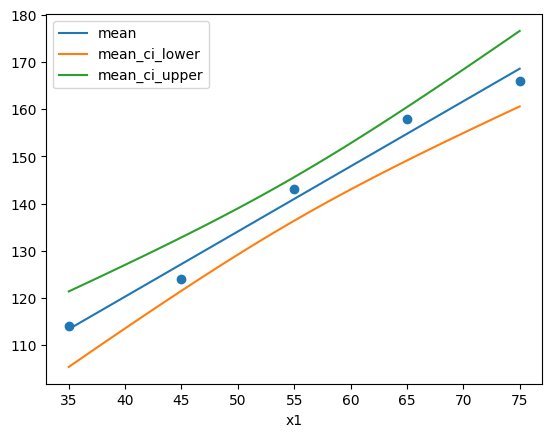

In [235]:
data = pd.DataFrame({'x1': [35, 45, 55, 65, 75],
                     'y': [114, 124, 143, 158, 166]})
model = smf.ols('y ~ x1', data).fit()
tmp = pd.DataFrame({'x1': np.linspace(35, 75, 100)})
ci = model.get_prediction(tmp).summary_frame(alpha=0.05)
df = ci[['mean', 'mean_ci_lower', 'mean_ci_upper']].assign(x1=tmp.x1)
_, ax = plt.subplots()
ax.scatter(data.x1, data.y)
df.plot(x='x1', ax=ax);

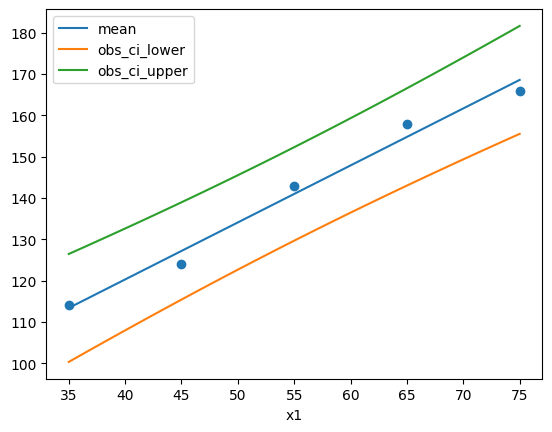

In [236]:
df = ci[['mean', 'obs_ci_lower', 'obs_ci_upper']].assign(x1=tmp.x1)
_, ax = plt.subplots()
ax.scatter(data.x1, data.y)
df.plot(x='x1', ax=ax);

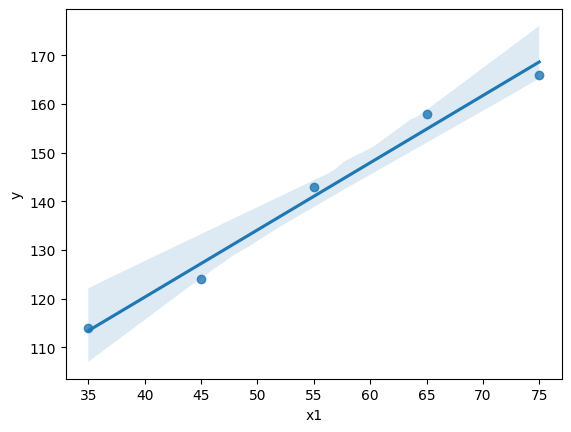

In [237]:
sns.regplot(x=data.x1, y=data.y, ci=95);

# 12 関数の極限と連続性

In [238]:
f = lambda x: 2 * x - 3; var('x')
limit(f(x), x, 1)

-1

In [239]:
limit(2 * x - 3, x, 1)

-1

In [240]:
g = lambda x: (x**2 - 2) / (x - sqrt(2))
limit(g(x), x, sqrt(2))

2*sqrt(2)

In [241]:
limit((1 + 1 / x)**x, x, oo)

E

In [242]:
limit(1 / x**2, x, 0)

oo

In [243]:
limit(abs(x) / x, x, 0, dir='+'), limit(abs(x) / x, x, 0, dir='-')

(1, -1)

# 13 微分

In [244]:
f = lambda x: x**3; var('h'); a = 1
limit((f(a + h) - f(a)) / h, h, 0)

3

In [245]:
f = lambda x: x**3; var('x')
diff(f(x), x)

3*x**2

In [246]:
f = lambda x: x**3; var('x')
f1 = Lambda(x, diff(f(x), x))
f2 = diff(f(x), x)
f1, f2

(Lambda(x, 3*x**2), 3*x**2)

In [247]:
f1(1), f2.subs(x, 1)

(3, 3)

In [248]:
diff(x**3, x, 2)

6*x

In [249]:
var('a b t x')
f = lambda t: t**2
g = lambda x: a * x + b
fp = Lambda(t, diff(f(t), t)); gp = Lambda(x, diff(g(x), x))
(Lambda(x, diff(Lambda(x, f(g(x)))(x), x))(x), # ①
 diff(f(g(x)), x),                             # ②
 diff(f(t), t).subs(t, g(x)) * diff(g(x), x),  # ③
 fp(g(x)) * gp(x))                             # ④

(2*a*(a*x + b), 2*a*(a*x + b), a*(2*a*x + 2*b), a*(2*a*x + 2*b))

In [250]:
var('x'); tmp = series(sin(x), x, x0=0, n=6); tmp

x - x**3/6 + x**5/120 + O(x**6)

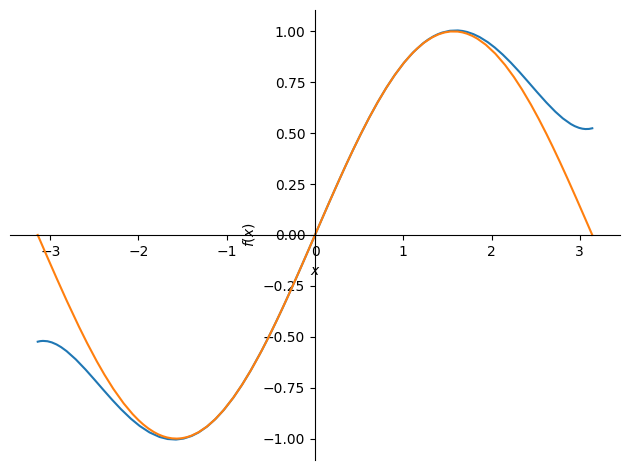

In [251]:
plot(*(tmp.removeO(), sin(x)), (x, -pi, pi));

In [252]:
a = 0;
np.sum([diff(sin(x), x, k).subs(x, a) * (x - a)**k / factorial(k)
        for k in range(6)])

x**5/120 - x**3/6 + x

In [253]:
f = lambda x: x**3 - 12 * x; var('x')
sol = solve(diff(f(x), x), x); print(sol)
series(f(x), x0=sol[0], n=3)

[-2, 2]


16 - 6*(x + 2)**2 + O((x + 2)**3, (x, -2))

# 14 積分

In [254]:
var('x')
integrate(-x**2 + 4 * x + 1, (x, 1, 4))

12

In [255]:
f = lambda x: -x**2 + 4 * x + 1; var('k n')
a = 1; b = 4; h = (b - a) / n
s = simplify(Sum(f(a + h * k) * h, (k, 1, n)).doit()); print(s)
limit(s, n, oo)

12 - 9/(2*n) - 9/(2*n**2)


12

In [256]:
var('a t x'); integrate(-t**2 + 4 * t + 1, (t, a, x))

a**3/3 - 2*a**2 - a - x**3/3 + 2*x**2 + x

In [257]:
integrate(-x**2 + 4 * x + 1, x)

-x**3/3 + 2*x**2 + x

In [258]:
var('x'); y = Function('y')
dsolve(Eq(diff(y(x), x), -x**2 + 4 * x + 1), y(x))

Eq(y(x), C1 - x**3/3 + 2*x**2 + x)

In [259]:
dsolve(Eq(diff(y(x), x), -x**2 + 4 * x + 1), y(x), ics={y(0): 1})

Eq(y(x), -x**3/3 + 2*x**2 + x + 1)

In [260]:
tmp = dsolve(Eq(diff(y(x), x), -x * y(x)), y(x)); tmp

Eq(y(x), C1*exp(-x**2/2))

In [261]:
solve(Eq(integrate(tmp.rhs, (x, -oo, oo)), 1), 'C1')

[sqrt(2)/(2*sqrt(pi))]

In [262]:
f = Function('f'); var('a t x')
Lambda(x, diff(Lambda(x, integrate(f(t), (t, a, x)))(x), x))

Lambda(x, f(x))

In [263]:
diff(integrate(f(t), (t, a, x)), x)

f(x)

In [264]:
var('x')
F = integrate(-x**2 + 4 * x + 1, x)
F.subs(x, 4) - F.subs(x, 1)

12

In [265]:
var('x'); integrate((x**2 + 2 * x + 1 + (3 * x + 1) * sqrt(x + log(x))) /
                    (x * sqrt(x + log(x)) * (x + sqrt(x + log(x)))), x)

2*sqrt(x + log(x)) + 2*log(x + sqrt(x + log(x)))

In [266]:
var('a x')
simplify(integrate(1/x**a, (x, 0, 1)))

Piecewise((-1/(a - 1), ((a > -oo) | (a > 1)) & ((a > -oo) | (a < oo)) & ((a > 1) | (a < 1)) & ((a < 1) | (a < oo))), (oo, True))

In [267]:
integrate(1/x**a, (x, 1, oo))

Piecewise((1/(a - 1), re(a) > 1), (Integral(x**(-a), (x, 1, oo)), True))

In [268]:
var('x'); integrate(exp(-x**2), (x, -oo, oo))

sqrt(pi)

# 15 多変数関数の微分積分

In [269]:
f = lambda x, y: x**2 * y / (x**4 + y**2); var('x y r theta')
(limit(limit(f(x, y), x, 0), y, 0),              # ①
 limit(limit(f(x, y), y, 0), x, 0),              # ②
 limit(f(r * cos(theta), r * sin(theta)), r, 0), # ③
 limit(f(x, x**2), x, 0))                        # ④

(0, 0, 0, 1/2)

In [270]:
f = lambda x, y: 2 - x**2 - y**2; var('x y')
(diff(f(x, y), x), diff(f(x, y), y))

(-2*x, -2*y)

In [271]:
diff(f(x, y), Matrix([x, y]))

Matrix([
[-2*x],
[-2*y]])

In [272]:
f = lambda x, y: 2 * x**3 + 5 * x * y + 2 * y**2; var('x y')
hessian(f(x, y), Matrix([x, y]))

Matrix([
[12*x, 5],
[   5, 4]])

In [273]:
f = lambda x: sqrt(x[0]**2 + x[1]**2); var('x1 x2 t');
x = Matrix([x1, x2]); a = Matrix([1, 1]); h = x - a;
F = lambda t: f(a + t * h)
expr = series(F(t), t, x0=0, n=3).removeO().subs(t, 1)
simplify(expr)

sqrt(2)*(x1**2 - 2*x1*x2 + 4*x1 + x2**2 + 4*x2)/8

In [274]:
gradf = diff(f(x), x).subs(zip(x, a))
H = hessian(f(x), x).subs(zip(x, a))
simplify(f(a) + gradf.dot(x - a) + (x - a).dot(H @ (x - a)) / 2)

sqrt(2)*(x1**2 - 2*x1*x2 + 4*x1 + x2**2 + 4*x2)/8

In [275]:
f = lambda x: 2 * x[0]**3 + x[0] * x[1]**2 + 5 * x[0]**2 + x[1]**2
var('x1 x2', real=True); x = Matrix([x1, x2])       # x1, x2は実数
points = solve(diff(f(x), x), x)                    # 停留点
H = hessian(f(x), x)                                # ヘッセ行列
def check(H, a):
    h = H.subs(zip(x, a))                           # 停留点でのヘッセ行列
    if h.is_positive_definite: return (a, f(a), -1) # 極小
    if h.is_negative_definite: return (a, f(a), 1)  # 極大
    if h.is_indefinite: return (a, f(a), 0)         # 極値ではない
    else: return (a, f(a), None)                    # 不明
[check(H, a) for a in points]

[((-5/3, 0), 125/27, 1), ((-1, -2), 3, 0), ((-1, 2), 3, 0), ((0, 0), 0, -1)]

In [276]:
f = lambda x, y: x**2 + y**2; var('x y')
integrate(integrate(f(x, y), (y, 0, x)), (x, 0, 1))

1/3

In [277]:
integrate(integrate(f(x, y), (x, y, 1)), (y, 0, 1))

1/3

In [278]:
f = lambda x, y: x**2 + y**2; var('u v')
x, y = 2 * u, 3 * v
J = Matrix([x, y]).jacobian((u, v))
detJ = J.det(); print(detJ)
integrate(integrate(f(x, y) * abs(detJ),
                    (v, 0, 2 * u / 3)), (u, 0, sym.S(1) / 2))

6


1/3

In [279]:
var('r theta'); x, y = r * cos(theta), r * sin(theta)
J = Matrix([x, y]).jacobian((r, theta))
simplify(J.det())

r

# 16 ベクトル

In [280]:
a = Matrix([2, 3, 5]); len(a)

3

In [281]:
10 * Matrix([2, 3])

Matrix([
[20],
[30]])

In [282]:
u = Matrix([10, 20]); v = Matrix([2, 3]); u + v

Matrix([
[12],
[23]])

In [283]:
t = sym.S(10)
a = Matrix([1 / t + 2 / t, 1 / t + 2 / t - 3 / t]); b = Matrix([3 / t, 0])
a == b

True

In [284]:
a = np.array([1/10 + 2/10, 1/10 + 2/10 - 3/10]); b = np.array([3/10, 0])
np.allclose(a, b)

True

In [285]:
100 * Matrix([1, 2]) + 10 * Matrix([3, 1])

Matrix([
[130],
[210]])

In [286]:
100 * np.array([1, 2]) + 10 * np.array([3, 1])

array([130, 210])

In [287]:
a = Matrix([3, 4])
a.norm()

5

In [288]:
a = np.array([3, 4])
linalg.norm(a)

5.0

In [289]:
var('x y'); a = Matrix([x, y]); sqrt(a.dot(a))

sqrt(x**2 + y**2)

In [290]:
var('x y', real=True); a = Matrix([x, y]); a.norm()

sqrt(x**2 + y**2)

In [291]:
a = Matrix([3, 4])
a.normalized()

Matrix([
[3/5],
[4/5]])

In [292]:
a = np.array([3, 4])
a / linalg.norm(a)

array([0.6, 0.8])

In [293]:
a = Matrix([1, 0]); b = Matrix([1, 1])
acos(a.dot(b) / (a.norm() * b.norm()))

pi/4

In [294]:
a = np.array([1, 0]); b = np.array([1, 1])
np.arccos(a @ b / (linalg.norm(a) * linalg.norm(b)))

0.7853981633974484

# 17 行列

In [295]:
A = Matrix([[1, 2, 0], [0, 3, 4]]); A

Matrix([
[1, 2, 0],
[0, 3, 4]])

In [296]:
A = np.array([[1, 2, 0], [0, 3, 4]]); A

array([[1, 2, 0],
       [0, 3, 4]])

In [297]:
x = [5, 7]; diag(*x) # diag(x)はNG．diag(5, 7)はOK．

Matrix([
[5, 0],
[0, 7]])

In [298]:
x = [5, 7]; np.diag(x) # np.diag(*x)はNG．np.diag([5, 7])はOK．

array([[5, 0],
       [0, 7]])

In [299]:
Matrix([[1, 2], [2, 3]]).is_symmetric()

True

In [300]:
A = np.array([[1, 2], [2, 3]])
np.allclose(A.T, A)

True

In [301]:
A = Matrix([[11, 12, 13], [21, 22, 23], [31, 32, 33]]); A

Matrix([
[11, 12, 13],
[21, 22, 23],
[31, 32, 33]])

In [302]:
An = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]]); An

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [303]:
A[0:2, 0:2], A[:2, :2] # 二つの方法

(Matrix([
 [11, 12],
 [21, 22]]),
 Matrix([
 [11, 12],
 [21, 22]]))

In [304]:
An[0:2, 0:2], An[:2, :2] # 二つの方法

(array([[11, 12],
        [21, 22]]),
 array([[11, 12],
        [21, 22]]))

In [305]:
A[:, 2]

Matrix([
[13],
[23],
[33]])

In [306]:
An[:, 2]

array([13, 23, 33])

In [307]:
An[:, [2]]

array([[13],
       [23],
       [33]])

In [308]:
A[1, :]

Matrix([[21, 22, 23]])

In [309]:
An[1, :]

array([21, 22, 23])

In [310]:
An[[1], :]

array([[21, 22, 23]])

In [311]:
10 * Matrix([[2, 3], [5, 7]])

Matrix([
[20, 30],
[50, 70]])

In [312]:
10 * np.array([[2, 3], [5, 7]])

array([[20, 30],
       [50, 70]])

In [313]:
Matrix([[10, 20], [30, 40]]) + Matrix([[2, 3], [4, 5]])

Matrix([
[12, 23],
[34, 45]])

In [314]:
np.array([[10, 20], [30, 40]]) + np.array([[2, 3], [4, 5]])

array([[12, 23],
       [34, 45]])

In [315]:
A = Matrix([[2, 3], [5, 7]]); B = Matrix([[1, 2], [3, 4]])
A @ B

Matrix([
[11, 16],
[26, 38]])

In [316]:
A = np.array([[2, 3], [5, 7]]); B = np.array([[1, 2], [3, 4]])
A @ B

array([[11, 16],
       [26, 38]])

In [317]:
A = Matrix([[2, 3], [5, 7]]); B = Matrix([[1, 2, 3], [4, 5, 6]]); S = A @ B
p, q = A.shape; r, s = B.shape
S1 = Matrix([[A[i, :].dot(B[:, j]) for j in range(s)] for i in range(p)]) # ①
S2 = sum((A[:, j] @ B[j, :] for j in range(q)), zeros(p, s))              # ②
S3 = Matrix.hstack(*[A @ B[:, j] for j in range(s)])                      # ③
S4 = Matrix.vstack(*[A[i, :] @ B for i in range(p)])                      # ④
S == S1, S == S2, S == S3, S == S4

(True, True, True, True)

In [318]:
A = np.array([[2, 3], [5, 7]]); B = np.array([[1, 2, 3], [4, 5, 6]]); S = A @ B
p, q = A.shape; r, s = B.shape
S1 = np.array(
    [[A[i, :].dot(B[:, j]) for j in range(s)] for i in range(p)])     # ①
S2 = sum((A[:, [j]] @ B[[j], :] for j in range(q)), np.zeros([p, s])) # ②
S3 = np.vstack([A @ B[:, j] for j in range(s)]).T                     # ③
S4 = np.vstack([A[i, :] @ B for i in range(p)])                       # ④
np.allclose(S, S1), np.allclose(S, S2), np.allclose(S, S3), np.allclose(S, S4)

(True, True, True, True)

In [319]:
var('a1 a2 x1 x2 p q r s')
x = Matrix([x1, x2]); a = Matrix([a1, a2])
G = Matrix([[p, q], [q, s]]); A = Matrix([[p, q], [r, s]])
(Eq(diff(a.dot(x), x), a),
 Eq(diff(x.dot(G @ x), x), 2 * G @ x),
 Eq(simplify(diff((A @ x).dot(A @ x), x) - 2 * A.T @ A @ x), zeros(2, 1)))

(True, True, True)

In [320]:
Matrix([[3, 2], [1, 2]]).det()

4

In [321]:
linalg.det(np.array([[3, 2], [1, 2]]))

4.0

In [322]:
Matrix([[2, 3], [5, 7]]).inv()

Matrix([
[-7,  3],
[ 5, -2]])

In [323]:
linalg.inv(np.array([[2, 3], [5, 7]]))

array([[-7.,  3.],
       [ 5., -2.]])

In [324]:
A = Matrix([[3, 2], [1, 2]]); b = Matrix([8, 4])
A.inv() @ b

Matrix([
[2],
[1]])

In [325]:
A = np.array([[3, 2], [1, 2]]); b = np.array([8, 4])
linalg.inv(A) @ b

array([2., 1.])

In [326]:
Matrix([[4, 2, 8], [2, 1, 4]]).rref()[0]

Matrix([
[1, 1/2, 2],
[0,   0, 0]])

In [327]:
A = Matrix([[2, 0, 2], [0, 2, -2], [2, 2, 0]])
A.rank()

2

In [328]:
A = np.array([[2, 0, 2], [0, 2, -2], [2, 2, 0]])
np.linalg.matrix_rank(A)

2

# 18 ベクトル空間

In [329]:
a1 = Matrix([3, 1]); a2 = Matrix([2, 2]); var('c1 c2')
solve(c1 * a1 + c2 * a2, (c1, c2))

{c1: 0, c2: 0}

In [330]:
A = Matrix([[1, 0, 1], [1, 1, 0], [0, 1, -1]])
A.columnspace()

[Matrix([
 [1],
 [1],
 [0]]),
 Matrix([
 [0],
 [1],
 [1]])]

In [331]:
A = Matrix([[1, 0, 1], [1, 1, 0], [0, 1, -1]])
tmp = A.columnspace()
basis = GramSchmidt(tmp, orthonormal=True); basis

[Matrix([
 [sqrt(2)/2],
 [sqrt(2)/2],
 [        0]]),
 Matrix([
 [-sqrt(6)/6],
 [ sqrt(6)/6],
 [ sqrt(6)/3]])]

In [332]:
Q = Matrix.hstack(*basis)
Q.T @ Q

Matrix([
[1, 0],
[0, 1]])

In [333]:
A = Matrix([[1, 2], [1, 2], [0, 0]]); B = Matrix([[1, 0], [1, 1], [0, 1]])
Qa, Ra = A.QRdecomposition()
Qb, Rb = B.QRdecomposition()
display(Qa, Ra, A == Qa @ Ra, Qb, Rb, B == Qb @ Rb)

Matrix([
[sqrt(2)/2],
[sqrt(2)/2],
[        0]])

Matrix([[sqrt(2), 2*sqrt(2)]])

True

Matrix([
[sqrt(2)/2, -sqrt(6)/6],
[sqrt(2)/2,  sqrt(6)/6],
[        0,  sqrt(6)/3]])

Matrix([
[sqrt(2), sqrt(2)/2],
[      0, sqrt(6)/2]])

True

In [334]:
A = np.array([[1, 2], [1, 2], [0, 0]]); B = np.array([[1, 0], [1, 1], [0, 1]])
Qa, Ra = linalg.qr(A)
Qb, Rb = linalg.qr(B)
Qa, Ra, np.allclose(A, Qa @ Ra), Qb, Rb, np.allclose(B, Qb @ Rb)

(array([[-0.70710678, -0.70710678,  0.        ],
        [-0.70710678,  0.70710678,  0.        ],
        [-0.        ,  0.        ,  1.        ]]),
 array([[-1.41421356, -2.82842712],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]),
 True,
 array([[-0.70710678,  0.40824829,  0.57735027],
        [-0.70710678, -0.40824829, -0.57735027],
        [-0.        , -0.81649658,  0.57735027]]),
 array([[-1.41421356, -0.70710678],
        [ 0.        , -1.22474487],
        [ 0.        ,  0.        ]]),
 True)

In [335]:
def qrd(A):
    (m, n) = A.shape
    u = [A[:, i].copy() for i in range(n)]; idx = []
    for i in range(n):
        for j in range(i): u[i] -= A[:, i].dot(u[j]) * u[j]
        s = u[i].norm()
        if not np.isclose(np.double(s), 0): u[i] /= s; idx.append(i)
    Q = Matrix.hstack(*[u[i] for i in idx]) if len(idx) != 0 else eye(m)
    return (Q, Q.T @ A)

A = Matrix([[1, 2], [1, 2], [0, 0]]); B = Matrix([[1, 0], [1, 1], [0, 1]])
qrd(A), qrd(B) # 動作確認

((Matrix([
  [sqrt(2)/2],
  [sqrt(2)/2],
  [        0]]),
  Matrix([[sqrt(2), 2*sqrt(2)]])),
 (Matrix([
  [sqrt(2)/2, -sqrt(6)/6],
  [sqrt(2)/2,  sqrt(6)/6],
  [        0,  sqrt(6)/3]]),
  Matrix([
  [sqrt(2), sqrt(2)/2],
  [      0, sqrt(6)/2]])))

In [336]:
def qrdn(An):
    A = An.astype(float) # 成分を浮動小数点数に変換する．
    (m, n) = A.shape
    u = [A[:, i].copy() for i in range(n)]; idx = []
    for i in range(n):
        for j in range(i): u[i] -= A[:, i].dot(u[j]) * u[j]
        s = linalg.norm(u[i])
        if not np.isclose(s, 0): u[i] /= s; idx.append(i)
    Q = np.array([u[i] for i in idx]).T if len(idx) != 0 else np.eye(m)
    return (Q, Q.T @ A)

A = np.array([[1, 2], [1, 2], [0, 0]]); B = np.array([[1, 0], [1, 1], [0, 1]])
qrdn(A), qrdn(B) # 動作確認

((array([[0.70710678],
         [0.70710678],
         [0.        ]]),
  array([[1.41421356, 2.82842712]])),
 (array([[ 0.70710678, -0.40824829],
         [ 0.70710678,  0.40824829],
         [ 0.        ,  0.81649658]]),
  array([[1.41421356e+00, 7.07106781e-01],
         [1.66533454e-16, 1.22474487e+00]])))

In [337]:
B = Matrix([[1, 0], [1, 1], [0, 1]])
Q, R = qrd(B)                # QR分解
(Q.T @ Q == eye(Q.shape[1]), # ①（厳密値を想定）
 R.is_upper,                 # ②（厳密値を想定）
 Q @ R == B)                 # ③（厳密値を想定）

(True, True, True)

In [338]:
B = np.array([[1, 0], [1, 1], [0, 1]])
Q, R = qrdn(B)                             # QR分解
(np.allclose(Q.T @ Q, np.eye(Q.shape[1])), # ①
 np.allclose(R, np.triu(R)),               # ②
 np.allclose(Q @ R, B))                    # ③

(True, True, True)

In [339]:
A = Matrix([[1, 0], [1, 1], [0, 1]])
A.T.nullspace()

[Matrix([
 [ 1],
 [-1],
 [ 1]])]

In [340]:
A = np.array([[1, 0], [1, 1], [0, 1]])
linalg.null_space(A.T) # 正規直交基底

array([[ 0.57735027],
       [-0.57735027],
       [ 0.57735027]])

In [341]:
A = Matrix([[1, 0], [1, 1], [0, 1]])
basis1 = A.QRdecomposition()[0]                         # 列空間
basis2 = GramSchmidt(A.T.nullspace(), orthonormal=True) # 直交補空間
Q = Matrix.hstack(basis1, *basis2)
Q, Q.T @ Q == eye(3)

(Matrix([
 [sqrt(2)/2, -sqrt(6)/6,  sqrt(3)/3],
 [sqrt(2)/2,  sqrt(6)/6, -sqrt(3)/3],
 [        0,  sqrt(6)/3,  sqrt(3)/3]]),
 True)

In [342]:
A = np.array([[1, 0], [1, 1], [0, 1]])
basis1 = linalg.qr(A, mode='economic')[0] # 列空間
basis2 = linalg.null_space(A.T)           # 直交補空間
Q = np.hstack([basis1, basis2])
Q, np.allclose(Q.T @ Q, np.eye(3))

(array([[-0.70710678,  0.40824829,  0.57735027],
        [-0.70710678, -0.40824829, -0.57735027],
        [-0.        , -0.81649658,  0.57735027]]),
 True)

# 19 固有値と固有ベクトル

In [343]:
A = Matrix([[5, 6, 3], [0, 9, 2], [0, 6, 8]])
eigs = A.eigenvects()
vals = [e[0] for e in eigs for _ in range(e[1])] # 固有値（順序不明）
vecs = [v for e in eigs for v in e[2]]           # 固有ベクトル（非正規）
vals, vecs

([5, 5, 12],
 [Matrix([
  [1],
  [0],
  [0]]),
  Matrix([
  [   0],
  [-1/2],
  [   1]]),
  Matrix([
  [  1],
  [2/3],
  [  1]])])

In [344]:
An = np.array([[5, 6, 3], [0, 9, 2], [0, 6, 8]])
valsn, vecsn = linalg.eig(An)
valsn, vecsn # 固有値（順序不明），固有ベクトル（正規）

(array([ 5.+0.j, 12.+0.j,  5.+0.j]),
 array([[ 1.        ,  0.63960215,  0.        ],
        [ 0.        ,  0.42640143, -0.4472136 ],
        [ 0.        ,  0.63960215,  0.89442719]]))

In [345]:
V = Matrix.hstack(*vecs); A @ V == V @ diag(*vals)

True

In [346]:
np.allclose(An @ vecsn, vecsn @ np.diag(valsn))

True

In [347]:
B = Matrix([[6, 7, 0], [7, 2, 0], [0, 0, 8]])
eigs = B.eigenvects()
vals = [e[0] for e in eigs for _ in range(e[1])] # 絶対値の降順とは限らない．
vecs = [v for e in eigs for v in e[2]]
idx = np.argsort([-abs(N(x)) for x in vals])     # 近似値で比較する．
vals = [vals[i] for i in idx]                    # 固有値（絶対値の降順）
vecs = [vecs[i] for i in idx]                    # 固有ベクトルも並べ替える．
vals                                             # 結果の確認

[4 + sqrt(53), 8, 4 - sqrt(53)]

In [348]:
B = np.array([[6, 7, 0], [7, 2, 0], [0, 0, 8]])
vals, vecs = np.linalg.eig(B)        # 絶対値の降順とは限らない．
idx = np.argsort(-abs(vals))         # 絶対値の降順の位置
vals, vecs = vals[idx], vecs[:, idx] # 絶対値の降順
vals                                 # 結果の確認

array([11.28010989,  8.        , -3.28010989])

In [349]:
A = Matrix([[5, 6, 3], [0, 9, 2], [0, 6, 8]]); n = A.shape[0]
var('x'); solve((x * eye(n) - A).det(), x)

[5, 12]

In [350]:
(5 * eye(n) - A).nullspace()

[Matrix([
 [1],
 [0],
 [0]]),
 Matrix([
 [   0],
 [-1/2],
 [   1]])]

In [351]:
S = Matrix([[2, 2, -2], [2, 5, -4], [-2, -4, 5]])
Q, L, V = S.singular_value_decomposition()
Q, L, S == Q @ L @ Q.T == V @ L @ V.T

(Matrix([
 [-2*sqrt(5)/5, 2*sqrt(5)/15, -1/3],
 [   sqrt(5)/5, 4*sqrt(5)/15, -2/3],
 [           0,    sqrt(5)/3,  2/3]]),
 Matrix([
 [1, 0,  0],
 [0, 1,  0],
 [0, 0, 10]]),
 True)

In [352]:
Sn = np.array([[2, 2, -2], [2, 5, -4], [-2, -4, 5]])
Q, lambdas, tV = linalg.svd(Sn); L = np.diag(lambdas)
Q, L, np.allclose(Sn, Q @ L @ Q.T), np.allclose(Sn, tV.T @ L @ tV)

(array([[-3.33333333e-01,  2.21595527e-16,  9.42809042e-01],
        [-6.66666667e-01,  7.07106781e-01, -2.35702260e-01],
        [ 6.66666667e-01,  7.07106781e-01,  2.35702260e-01]]),
 array([[10.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]),
 True,
 True)

In [353]:
S = Matrix([[2, 2, -2], [2, 5, -4], [-2, -4, 5]])
eigs = S.eigenvects()
vals = [e[0] for e in eigs for _ in range(e[1])] # ①-1
vecs = [v for e in eigs for v in e[2]]           # ①-2
tmp = GramSchmidt(vecs, orthonormal=True)        # ②
Q = Matrix.hstack(*tmp)                          # ③
L = diag(*vals)                                  # ④
Q, L, np.allclose(np.double(S), np.double(Q @ L @ Q.T)) # 近似的な比較

(Matrix([
 [-2*sqrt(5)/5, 2*sqrt(5)/15, -1/3],
 [   sqrt(5)/5, 4*sqrt(5)/15, -2/3],
 [           0,    sqrt(5)/3,  2/3]]),
 Matrix([
 [1, 0,  0],
 [0, 1,  0],
 [0, 0, 10]]),
 True)

In [354]:
Sn = np.array([[2, 2, -2], [2, 5, -4], [-2, -4, 5]])
tmp = linalg.eig(Sn); vals = tmp[0]; vecs = tmp[1] # ①
Q = linalg.qr(vecs)[0]                             # ②, ③
L = np.diag(vals)                                  # ④
Q, L, np.allclose(Sn, Q @ L @ Q.T)

(array([[-9.42809042e-01, -3.33333333e-01, -4.21671669e-17],
        [ 2.35702260e-01, -6.66666667e-01,  7.07106781e-01],
        [-2.35702260e-01,  6.66666667e-01,  7.07106781e-01]]),
 array([[ 1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, 10.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  1.+0.j]]),
 True)

In [355]:
Matrix([[4, 2], [2, 1]]).is_positive_semidefinite

True

In [356]:
A = Matrix([[4, 2], [2, 1]])
all(e >= 0 for e in A.eigenvals(multiple=True))

True

In [357]:
A = np.array([[4, 2], [2, 1]])
np.all(linalg.eigvals(A) >= 0)

True

In [358]:
x1 = [1, 3, 6, 10]; y = [7, 1, 6, 14]; X = Matrix([x1, y]).T
n = X.shape[0]; M = ones(n, n) / sym.S(n)
A = X - M @ X
S = A.T @ A; display(S)
eigs = S.eigenvects()
vals = [re(e[0]) for e in eigs for _ in range(e[1])] # 固有値
vecs = [re(v) for e in eigs for v in e[2]]           # 固有ベクトル
N(vecs[np.argmax(vals)].normalized()) # 最大固有値に対応する固有ベクトル
# 最大固有値の位置の探索と，固有ベクトルの正規化が必要

Matrix([
[46, 46],
[46, 86]])

Matrix([
[0.548303697135789],
[0.836279292884396]])

In [359]:
x1 = [1, 3, 6, 10]; y = [7, 1, 6, 14]; Xn = np.array([x1, y]).T
n = Xn.shape[0]; Mn = np.ones([n, n]) / n
An = Xn - Mn @ Xn
Sn = An.T @ An; print(Sn)
vals, vecs = linalg.eig(Sn)
vecs[:, np.argmax(vals)] # 最大固有値に対応する固有ベクトル
# 最大固有値の位置の探索が必要

[[46. 46.]
 [46. 86.]]


array([-0.5483037 , -0.83627929])

In [360]:
_, L, V = A.singular_value_decomposition() # 特異値分解
s = re(L.diagonal())  # 特異値
idx = np.argmax(s)    # 最大特異値の位置（SymPyでは0とは限らない）
display(N(V[:, idx])) # 対応するVの列ベクトル（求めるもの）
s2 = np.array(sorted([N(x)**2 for x in s], reverse=True)) # 特異値の2乗（降順）
np.cumsum(s2) / sum(s2)                                   # 累積寄与率（後述）

Matrix([
[0.548303697135789],
[0.836279292884396]])

array([0.879998066787408, 1.00000000000000], dtype=object)

In [361]:
_, s, tV = linalg.svd(An) # 特異値分解
print(tV.T[:, 0])         # Vの第1列（求めるもの）
s2 = s**2                 # 特異値の2乗
np.cumsum(s2) / sum(s2)   # 累積寄与率（後述）

[0.5483037  0.83627929]


array([0.87999807, 1.        ])

In [362]:
X = np.array([[1, 3, 6, 10], [7, 1, 6, 14]]).T

from statsmodels.multivariate import pca                # statsmodelsを使う場合
pca1 = pca.PCA(X, standardize=False, normalize=False)
P = pca1.scores; print(P)      # 主成分スコア
V = pca1.loadings; print(V)    # 主成分
print(V[:, 0])                 # 第1主成分（求めるもの）
s2 = pca1.eigenvals            # 特異値の2乗
print(np.cumsum(s2) / sum(s2)) # 累積寄与率（後述）

from sklearn import decomposition                      # Scikit-learnを使う場合
pca2 = decomposition.PCA()
P = pca2.fit_transform(X); print(P) # 主成分スコア
tV = pca2.components_; print(tV.T)  # 主成分
print(tV[0])                        # 第1主成分（求めるもの）
s2 = pca2.explained_variance_ratio_ # 特異値の2乗
print(np.cumsum(s2) / sum(s2))      # 累積寄与率（後述）

[[-2.19321479  3.34511717]
 [-6.11428315 -1.6172636 ]
 [-0.2879756  -1.38458299]
 [ 8.59547354 -0.34327058]]
[[ 0.5483037  -0.83627929]
 [ 0.83627929  0.5483037 ]]
[0.5483037  0.83627929]
[0.87999807 1.        ]
[[-2.19321479  3.34511717]
 [-6.11428315 -1.6172636 ]
 [-0.2879756  -1.38458299]
 [ 8.59547354 -0.34327058]]
[[ 0.5483037  -0.83627929]
 [ 0.83627929  0.5483037 ]]
[0.5483037  0.83627929]
[0.87999807 1.        ]


# 20 特異値分解と擬似逆行列

In [363]:
A = Matrix([[1, 0], [1, 1], [0, 1]])
Ur, Sr, Vr = A.singular_value_decomposition()
Ur, Sr, Vr.T, A == simplify(Ur @ Sr @ Vr.T)

(Matrix([
 [-sqrt(2)/2, sqrt(6)/6],
 [         0, sqrt(6)/3],
 [ sqrt(2)/2, sqrt(6)/6]]),
 Matrix([
 [1,       0],
 [0, sqrt(3)]]),
 Matrix([
 [-sqrt(2)/2, sqrt(2)/2],
 [ sqrt(2)/2, sqrt(2)/2]]),
 True)

In [364]:
An = np.array([[1, 0], [1, 1], [0, 1]])
U, s, tV = linalg.svd(An)
S = np.zeros(An.shape); r = len(s); S[:r, :r] = np.diag(s)
U, S, tV, np.allclose(An, U @ S @ tV)

(array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
        [-8.16496581e-01, -1.22629285e-16, -5.77350269e-01],
        [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01]]),
 array([[1.73205081, 0.        ],
        [0.        , 1.        ],
        [0.        , 0.        ]]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]),
 True)

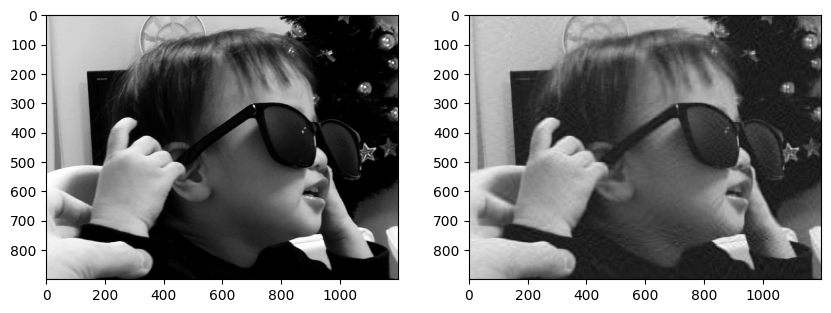

In [365]:
from skimage import io
url = 'https://github.com/taroyabuki/comath/raw/main/images/boy.jpg'
A = io.imread(url, as_gray=True)                  # 画像の行列への変換
U, s, tV = linalg.svd(A)                          # 特異値分解
k = 52
Ak = U[:, :k] @ np.diag(s[:k]) @ tV[:k, :]        # 近似
B = (Ak - np.min(Ak)) / (np.max(Ak) - np.min(Ak)) # 数値を0～1にする．
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(A, cmap='gray')
plt.subplot(1, 2, 2); plt.imshow(B, cmap='gray')
plt.show();

In [366]:
def exbasis(A): # tAの零空間（Aの列空間と直交）の基底を列ベクトルとする行列
    return Matrix.hstack(*GramSchmidt(A.T.nullspace(), orthonormal=True))
def svd2(A, tol=10e-10):
    m, n = A.shape; G = A.T @ A; eigs = G.eigenvects()               # ①
    vals = [re(e[0]) for e in eigs for _ in range(e[1])]             # ②-1a
    vecs = [re(v) for e in eigs for v in e[2]]                       # ②-1b
    idx = np.argsort([-abs(N(x)) for x in vals])                     # ②-2a
    vals, vecs = [vals[i] for i in idx], [vecs[i] for i in idx]      # ②-2b
    s = [sqrt(x) for x in vals if abs(N(x)) > tol]; r = len(s)       # ③
    if r != 0:
        Sr = diag(*s)                                                # ④
        Vr = Matrix.hstack(*GramSchmidt(vecs[:r], orthonormal=True)) # ⑤
        Ur = A @ Vr @ diag(*[1 / x for x in s])                      # ⑥
        S = 0 * A; S[:r, :r] = Sr                                    # ⑦
        V = Vr if n == r else Vr.row_join(exbasis(Vr))               # ⑧
        U = Ur if m == r else Ur.row_join(exbasis(Ur))               # ⑨
    else:
        S = 0 * A; V = eye(n); U = eye(m)
        Sr = Matrix([[0]]); Vr = V[:, 0]; Ur = U[: ,0]
    return Ur, Sr, Vr, U, S, V

A = Matrix([[1, 0], [1, 1], [0, 1]]); svd2(A) # 動作確認

(Matrix([
 [sqrt(6)/6, -sqrt(2)/2],
 [sqrt(6)/3,          0],
 [sqrt(6)/6,  sqrt(2)/2]]),
 Matrix([
 [sqrt(3), 0],
 [      0, 1]]),
 Matrix([
 [sqrt(2)/2, -sqrt(2)/2],
 [sqrt(2)/2,  sqrt(2)/2]]),
 Matrix([
 [sqrt(6)/6, -sqrt(2)/2,  sqrt(3)/3],
 [sqrt(6)/3,          0, -sqrt(3)/3],
 [sqrt(6)/6,  sqrt(2)/2,  sqrt(3)/3]]),
 Matrix([
 [sqrt(3), 0],
 [      0, 1],
 [      0, 0]]),
 Matrix([
 [sqrt(2)/2, -sqrt(2)/2],
 [sqrt(2)/2,  sqrt(2)/2]]))

In [367]:
def svd2n(A, tol=10e-10):
    m, n = A.shape; G = A.T @ A                                   # ①
    vals, vecs = linalg.eig(G); vals, vecs = vals.real, vecs.real # ②-1
    idx = np.argsort(-abs(vals))                                  # ②-2a
    vals, vecs = vals[idx], vecs[:, idx]                          # ②-2b
    s = [np.sqrt(x) for x in vals if x > tol]; r = len(s)         # ③
    Sr = np.diag(s)                                               # ④
    V = linalg.qr(vecs[:, :r])[0]; Vr = V[:, :r]                  # ⑤, ⑧
    Ur = A @ Vr / s                                               # ⑥
    S = 0.0 * A; S[:r, :r] = Sr                                   # ⑦
    if (r != 0): U = np.hstack([Ur, linalg.null_space(Ur.T)])     # ⑨
    else: U = np.eye(m)
    return Ur, Sr, Vr, U, S, V

A = np.array([[1, 0], [1, 1], [0, 1]]); svd2n(A) # 動作確認

(array([[-4.08248290e-01, -7.07106781e-01],
        [-8.16496581e-01,  1.11022302e-16],
        [-4.08248290e-01,  7.07106781e-01]]),
 array([[1.73205081, 0.        ],
        [0.        , 1.        ]]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([[-4.08248290e-01, -7.07106781e-01,  5.77350269e-01],
        [-8.16496581e-01,  1.11022302e-16, -5.77350269e-01],
        [-4.08248290e-01,  7.07106781e-01,  5.77350269e-01]]),
 array([[1.73205081, 0.        ],
        [0.        , 1.        ],
        [0.        , 0.        ]]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [368]:
isOrtho = lambda A: np.allclose(
    np.double(A.T) @ np.double(A), np.eye(A.shape[1]))
isSquare = lambda A: A.shape[0] == A.shape[1]
isDiagDesc = lambda A: (
    list(A.diagonal()) == sorted(abs(A.diagonal()), reverse=True))

A = Matrix([[1., 0], [1, 1], [0, 1]])
Ur, Sr, Vr, U, S, V = svd2(A)                          # 特異値分解
[isOrtho(Ur), isOrtho(Vr), isOrtho(U), isOrtho(V),     # ①
 isSquare(U), isSquare(V),                             # ②
 isDiagDesc(Sr), isDiagDesc(S),                        # ③
 np.allclose(np.double(A), np.double(Ur @ Sr @ Vr.T)), # ④-1
 np.allclose(np.double(A), np.double(U @ S @ V.T))]    # ④-2

[True, True, True, True, True, True, True, True, True, True]

In [369]:
isOrthon = lambda A: np.allclose(A.T @ A, np.eye(A.shape[1]))
isSquaren = lambda A: A.shape[0] == A.shape[1]
isDiagDescn = lambda A: all(
    A.diagonal() == sorted(abs(A.diagonal()), reverse=True))

A = np.array([[1, 0], [1, 1], [0, 10]])
Ur, Sr, Vr, U, S, V = svd2n(A)                         # 特異値分解
[isOrthon(Ur), isOrthon(Vr), isOrthon(U), isOrthon(V), # ①
 isSquaren(U), isSquaren(V),                           # ②
 isDiagDescn(Sr), isDiagDescn(S),                      # ③
 np.allclose(np.double(A), np.double(Ur @ Sr @ Vr.T)), # ④-1
 np.allclose(np.double(A), np.double(U @ S @ V.T))]    # ④-2

[True, True, True, True, True, True, True, True, True, True]

In [370]:
A = Matrix([[1, 0], [1, 1], [0, 1]]); A.pinv()

Matrix([
[ 2/3, 1/3, -1/3],
[-1/3, 1/3,  2/3]])

In [371]:
A = np.array([[1, 0], [1, 1], [0, 1]]); linalg.pinv(A)

array([[ 0.66666667,  0.33333333, -0.33333333],
       [-0.33333333,  0.33333333,  0.66666667]])

In [372]:
A = Matrix([[1, 0], [1, 1], [0, 1]]); b = Matrix([2, 0, 2])
A.pinv() @ b

Matrix([
[2/3],
[2/3]])

In [373]:
A = np.array([[1, 0], [1, 1], [0, 1]]); b = np.array([2, 0, 2])
linalg.pinv(A) @ b

array([0.66666667, 0.66666667])